# Graph for K Fold Cross Validation (Common for all calibration techniques)

In [ ]:
locationimages = []
aezimages = []

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

params = {'legend.fontsize': 18,
          'legend.handlelength': 2}
plt.rcParams.update(params)

# Define a function to classify seasons
def get_season(date_str):

    date = datetime.strptime(str(date_str).split('T')[0], '%Y-%m-%d')

    if date.month in [1, 2, 3]:
        return 'Jan - Mar'
    elif date.month in [4, 5, 6]:
        return 'Apr - Jun'
    elif date.month in [7, 8, 9]:
        return 'Jul - Sep'
    else:
        return 'Oct - Dec'

def graphing(imd_et, calibrated_et, date_et, loc, X_columns, img):

  seasons = [get_season(date) for date in date_et]

  season_colors = {
      'Jan - Mar': 'blue',
      'Apr - Jun': 'green',
      'Jul - Sep': 'orange',
      'Oct - Dec': 'purple'
  }

  # Get colors for each data point based on the season
  colors = [season_colors[season] for season in seasons]

  y_actual = imd_et
  y_pred_train = calibrated_et

  plt.figure(figsize=(10, 6))

  # Plot the data points with colors based on the season
  for season in season_colors:
      season_indices = [i for i, s in enumerate(seasons) if s == season]
      plt.scatter(
          np.array(y_actual)[season_indices],
          np.array(y_pred_train)[season_indices],
          s=50,
          alpha=0.7,
          edgecolors='w',
          linewidth=0.5,
          label=season,
          color=season_colors[season]
      )

  # Plot the 45-degree line
  plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')

  ax = plt.gca()  # Get current axis
  ax.tick_params(axis='x', labelsize=24)  # Adjust as needed

  ax = plt.gca()  # Get current axis
  ax.tick_params(axis='y', labelsize=24)  # Adjust as needed

  # Set axis labels
  plt.xlim(0, max(y_actual) + 1)
  plt.ylim(0, max(y_actual) + 1)
  plt.xlabel('IMD ET', fontsize=28)
  plt.ylabel('Calibrated ET', fontsize=28)

  # If the number of input features is large, then that means that the model is using both the LANDSAT as well as FLDAS features as inputs
  # Set plot title
  if len(X_columns)>5:
    plt.title('IMD vs. Calibrated ET - (FLDAS + LANDSAT)', fontsize=28)
  else:
    plt.title('IMD vs. Calibrated ET - (Only FLDAS)', fontsize=28)

  # Add legend
  plt.legend(title='Season', title_fontsize=18)

  if len(X_columns)>5:
    name = loc+"_FLDAS+LANDSAT.png"
  else:
    name = loc+"_FLDAS.png"

  # plt.savefig(name)
  plt.savefig(name, bbox_inches='tight', dpi=300)  # Adjust dpi as needed

  img.append(name)

  # Show the plot
  plt.show()


In [ ]:
# Optional - We stored the names of all images that were either AEZ level or for each individual location
print(len(aezimages), len(locationimages))

# Calibration using Multivariate Linear Regression

## K Fold Cross Validation(Multi Variate Linear Regression) - For each location

Dantiwada (AEZ-2)
**********************************
Average RMSE:  15.761948133932133
Average NRMSE:  0.3226097887147524
Average R-squared:  0.11576316418328014
Average Pearson Correlation:  0.30405349677326415
Coefficients: 0.0 0.9869610623937298 -0.20461032663681875 -781.605402741546 1.009173842086613 0.11300506518231437 
Intercepts:  6.318693262303838
Average p-values: 0.7171512680331638 0.07377023022422599 0.749358015017909 0.40399964023943163 0.16876734374849073 0.5000124433571767 
Average Training Points:  61
Average Testing Points:  15
Standard Errors: 17.030654938151216 0.4465266757078169 0.5776816323479708 822.3173795265972 0.6562556073502586 0.2040721271570655 
**********************************




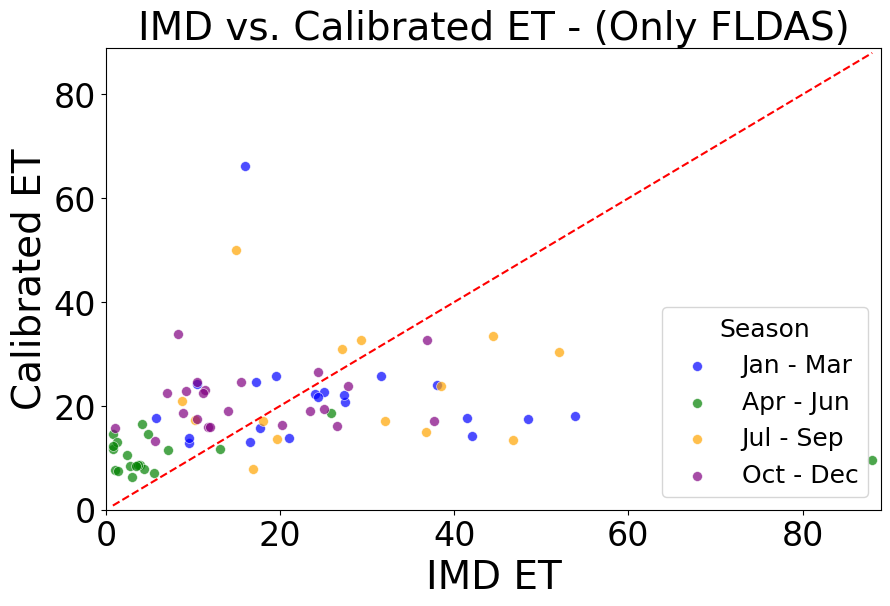

Jodhpur (AEZ-2)
**********************************
Average RMSE:  13.314893962903117
Average NRMSE:  0.37285148519096956
Average R-squared:  0.04383512302824864
Average Pearson Correlation:  0.03967310117265672
Coefficients: 0.0 -1.2435141748096323 -0.48076490087500445 1251.731551526163 6.116116591799201 -0.18750748658628796 
Intercepts:  -217.14320560516208
Average p-values: 0.23462746751325997 0.29247773330588406 0.2088663372143952 0.18772205738312212 0.19275213802555988 0.6660341650208238 
Average Training Points:  59
Average Testing Points:  14
Standard Errors: 165.46224205768854 1.1197360991136496 0.3404570011816834 840.77191063319 4.251125223296478 0.30481662288655453 
**********************************




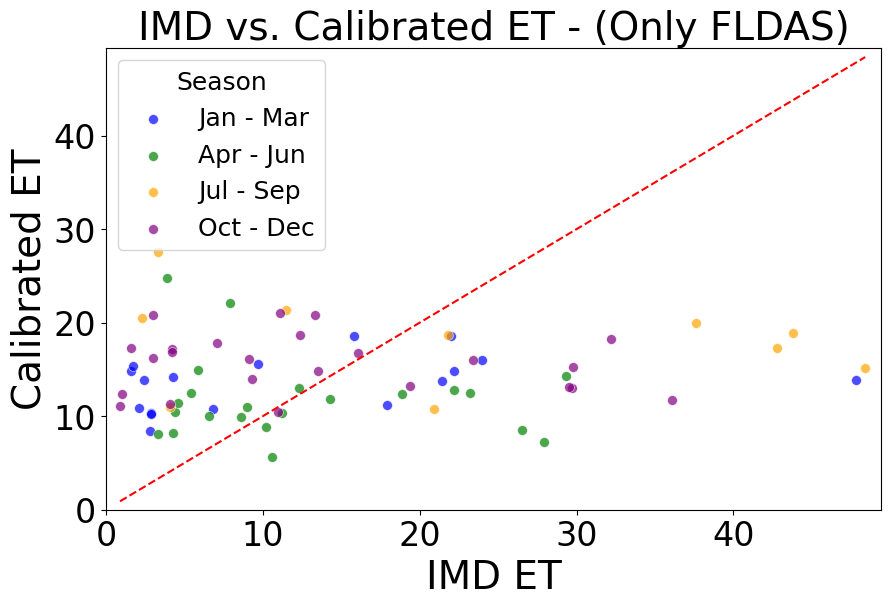

Durgapura (AEZ-4)
**********************************
Average RMSE:  9.607445552961735
Average NRMSE:  0.2698485629208058
Average R-squared:  0.2163700096730504
Average Pearson Correlation:  0.4325652457290251
Coefficients: 0.0 0.49389197922088635 -0.46289177174139107 793.0554790128572 1.8178517726608898 -0.013463204145198715 
Intercepts:  -54.736263440212575
Average p-values: 0.6802358505704621 0.353328178516745 0.020107183084995393 0.14647199806040395 0.6698421545125862 0.8626815875622504 
Average Training Points:  73
Average Testing Points:  18
Standard Errors: 195.33638695133595 0.5283213532801145 0.19358952767705812 515.427586048659 4.925506892762694 0.1287708575179461 
**********************************




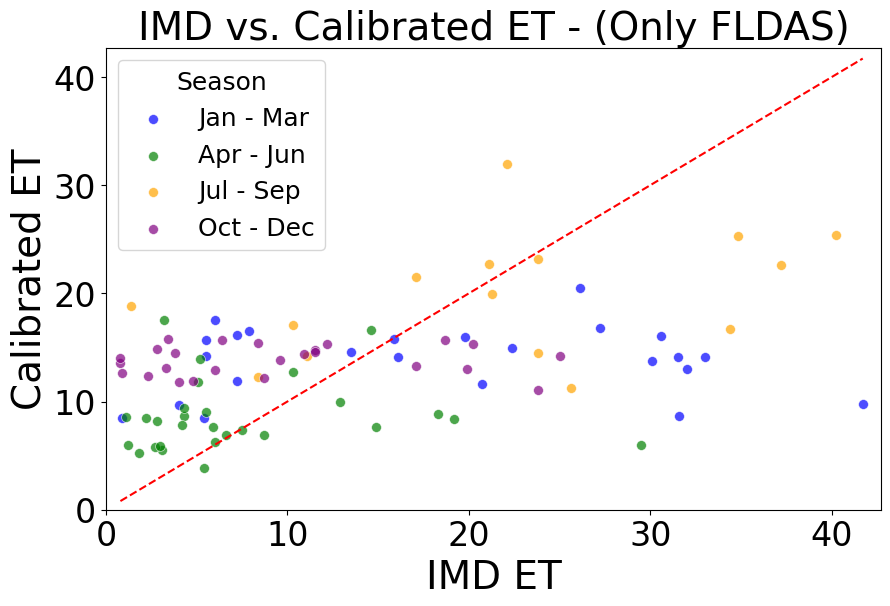

New Delhi (AEZ-4)
**********************************
Average RMSE:  14.434403671575557
Average NRMSE:  0.3368514671330195
Average R-squared:  0.17242627564608
Average Pearson Correlation:  0.3758787848175832
Coefficients: 0.0 0.8671277096353854 0.5439149186365194 -535.1076890757782 0.9478871680651553 0.06953931706857423 
Intercepts:  -14.084353843799978
Average p-values: 0.2674950735287544 0.06438938910731526 0.11713148800873037 0.506638003605213 0.12159373415841657 0.5881537430560886 
Average Training Points:  92
Average Testing Points:  23
Standard Errors: 11.422885161582688 0.3024970629388043 0.2736670978462385 728.6814560117105 0.5276422472187262 0.1488908592820465 
**********************************




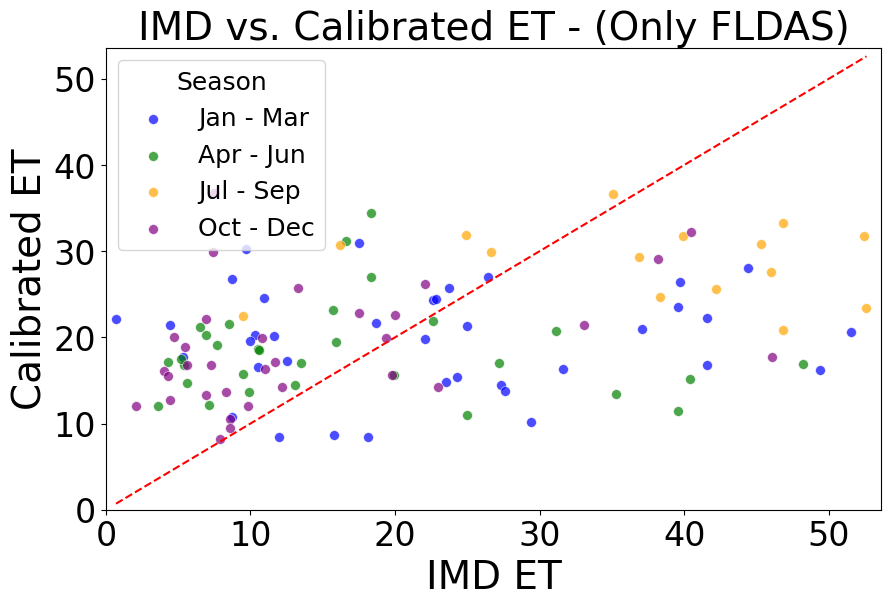

Rajkot (AEZ-4)
**********************************
Average RMSE:  3.4051502027290317
Average NRMSE:  0.28103419354211906
Average R-squared:  0.34504793183893384
Average Pearson Correlation:  0.5617266342463687
Coefficients: 0.0 0.06797783314727263 0.09159460977701553 -70.46704521816693 0.5947151861717266 0.019280239331428077 
Intercepts:  -8.33682289040868
Average p-values: 0.045180876838381505 0.5567739775421106 0.45163607399044786 0.6480057840066562 0.0013921843565846514 0.5762454498217451 
Average Training Points:  77
Average Testing Points:  19
Standard Errors: 3.6496011079420767 0.11437435873121253 0.11383850769178339 178.3429692297233 0.16465190299709506 0.024555453338372467 
**********************************




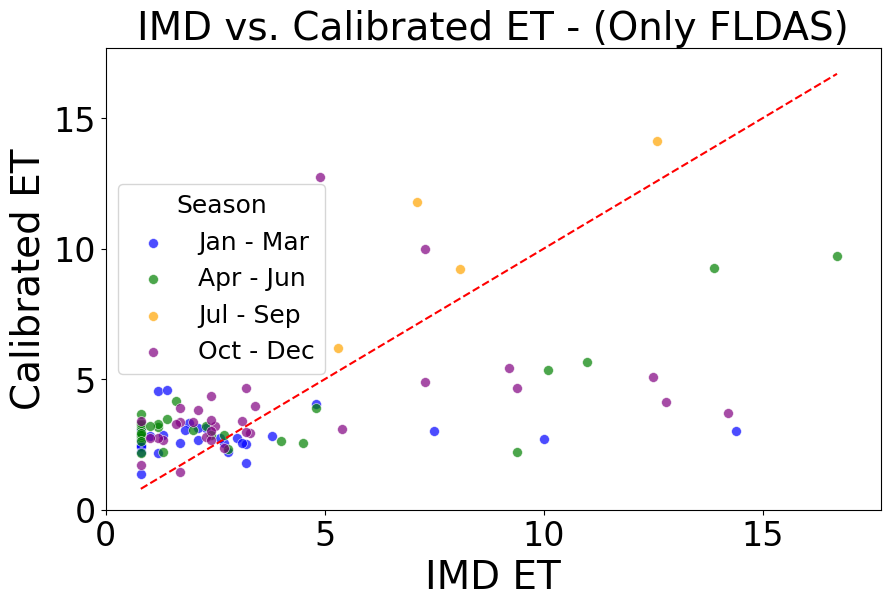

Anand (AEZ-5)
**********************************
Average RMSE:  16.241663978761
Average NRMSE:  0.37083427935274216
Average R-squared:  0.10237079916175931
Average Pearson Correlation:  0.23440649204915393
Coefficients: 0.0 -0.9250291059694252 -1.7898994982967036 -186.57837378432592 1.0684452478273514 -0.07945865846802316 
Intercepts:  64.55664331300818
Average p-values: 0.007080807983392741 0.2954111356603814 0.04261197086446171 0.659925464424291 0.3015335563852478 0.6026636705369507 
Average Training Points:  40
Average Testing Points:  10
Standard Errors: 19.93544514445693 0.8088397791428192 0.7864508786224935 1276.0035903817702 0.9228988501770328 0.14086491733407974 
**********************************




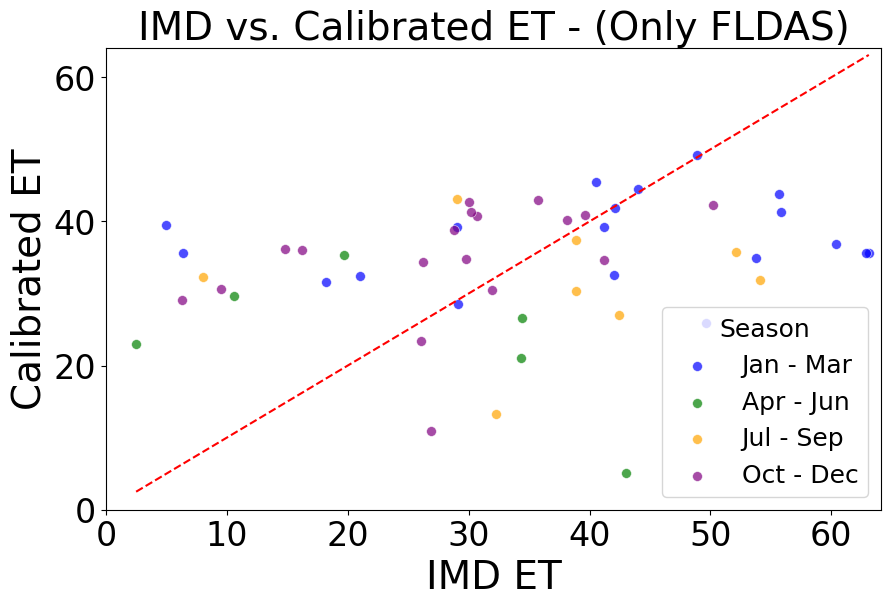

Bhopal (AEZ-10)
**********************************
Average RMSE:  10.2566230769286
Average NRMSE:  0.300425408825697
Average R-squared:  0.488204371099069
Average Pearson Correlation:  0.6814918614008356
Coefficients: 0.0 0.8362536573265045 -1.253087827057071 1960.4290210364584 -0.6920255374304751 -0.14278813976985164 
Intercepts:  43.0073122516798
Average p-values: 8.456083778605423e-05 0.028644644374704775 0.00022540440793059117 0.05039287166794042 0.09204117790732307 0.5302896527246347 
Average Training Points:  41
Average Testing Points:  10
Standard Errors: 9.523941169418208 0.28029536702260016 0.29626999060843706 918.6220696819446 0.3647819221875624 0.35669983261322724 
**********************************




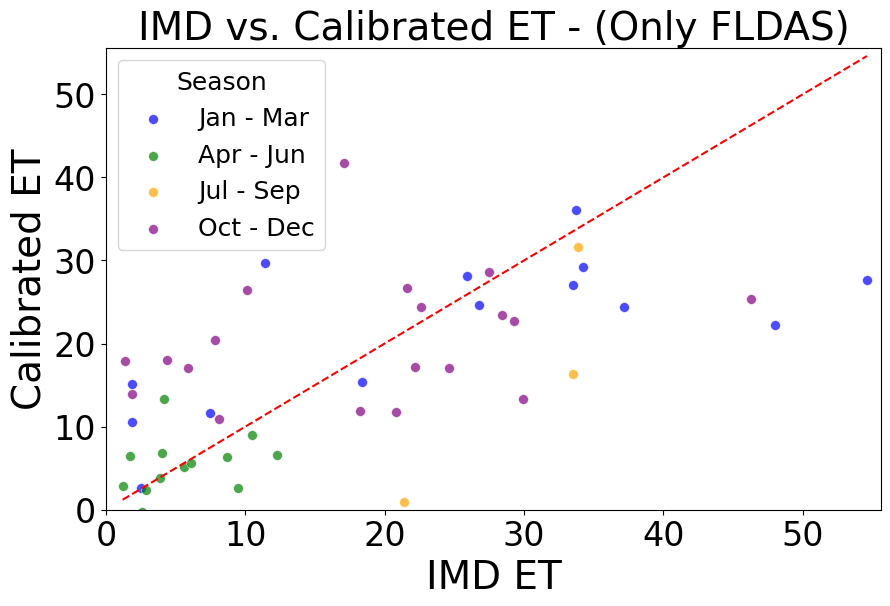

Raipur (AEZ-11)
**********************************
Average RMSE:  10.125404687292232
Average NRMSE:  0.28601593641487816
Average R-squared:  0.06735597024390022
Average Pearson Correlation:  0.2312586740193076
Coefficients: 0.0 -0.6407780821742199 -0.3171246899153891 810.2653761398923 0.36633763813221953 -0.046454834164743976 
Intercepts:  28.52315333565383
Average p-values: 0.000500788813846563 0.015384233534380402 0.2443632593361828 0.1685819237987863 0.22759446601330188 0.4908134124964477 
Average Training Points:  99
Average Testing Points:  24
Standard Errors: 7.590824869730159 0.24931796242241816 0.2563924323085657 565.8400141692485 0.28721557183131374 0.06694227828949353 
**********************************




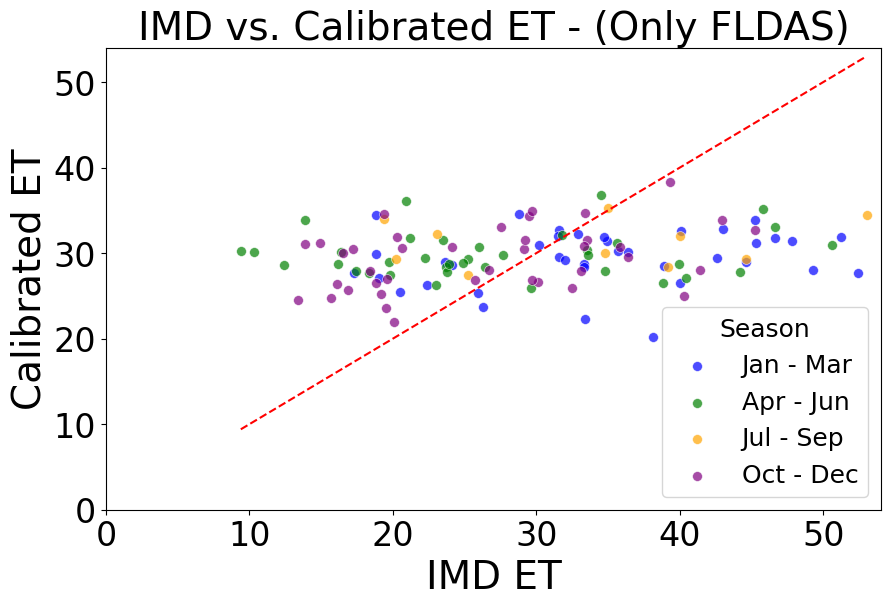

Lucknow (AEZ-13)
**********************************
Average RMSE:  8.069498947909775
Average NRMSE:  0.25059602820693994
Average R-squared:  0.2762629729056448
Average Pearson Correlation:  0.5132959838017777
Coefficients: 0.0 0.4632493827943489 0.3048484273184001 597.4495310288072 0.030271070372634268 0.005295612451430141 
Intercepts:  -2.4176830942438317
Average p-values: 0.5776983874772589 0.07984928569811427 0.08361252257883926 0.17234877775652946 0.6213634624834156 0.7887680907339569 
Average Training Points:  106
Average Testing Points:  26
Standard Errors: 4.55517489268148 0.24328897606308492 0.15605669791936955 388.3324704792941 0.16185805201919232 0.10162377496985661 
**********************************




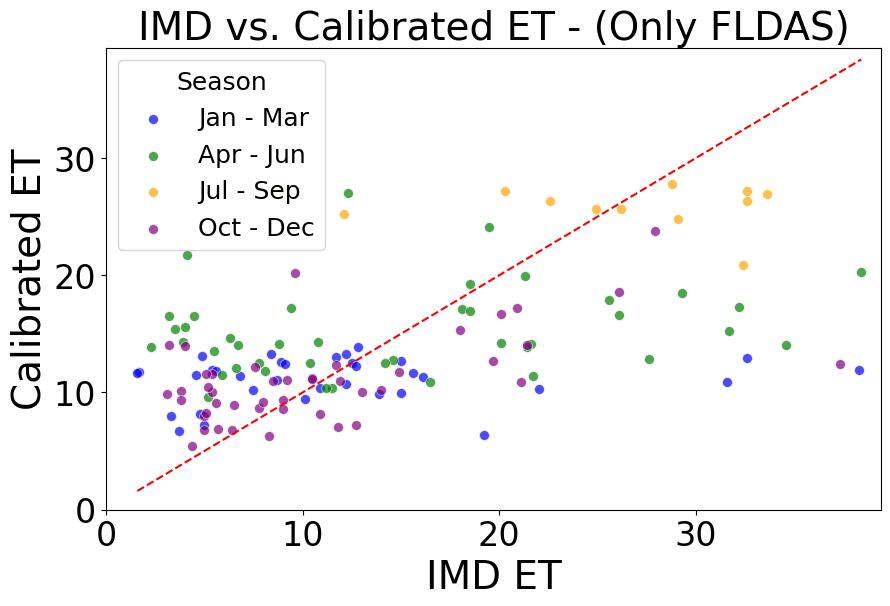

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold

import numpy as np
import statsmodels.api as sm

columns_to_read = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture','Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']
columns_to_replace = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

file_path = # Replace with the file path for the ET_Version_2 file in this repository

locations = ['Dantiwada (AEZ-2)', 'Jodhpur (AEZ-2)', 'Durgapura (AEZ-4)', 'New Delhi (AEZ-4)', 'Rajkot (AEZ-4)', 'Anand (AEZ-5)', 'Bhopal (AEZ-10)', 'Raipur (AEZ-11)', 'Lucknow (AEZ-13)']

for loc in locations:
  print(loc)

  # Read excel sheet and only the columns that we want
  df = pd.read_excel(file_path, sheet_name=loc, usecols=columns_to_read)

  # Logic for removing unneeded rows
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)

  # Following is code for removing outliers
  # ================= OUTLIER REMOVAL STARTS ================
  line_mean = df['Downscaled ET'].mean(skipna=True)
  line_std = df['Downscaled ET'].std(skipna=True)
  point_mean = df['IMD ET'].mean(skipna=True)
  point_std = df['IMD ET'].std(skipna=True)

  # Create a mask for outliers
  outlier_mask = (np.abs(df['IMD ET']) > point_mean + 2*point_std) | (np.abs(df['IMD ET']) < point_mean - 2*point_std)

  df.loc[outlier_mask, ['IMD ET']] = 0
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)
# # ================= OUTLIER REMOVAL ENDS ================


#     # Before Calibration stats(Uncomment below to print stats before calibration) =================================

#   y_test = df['IMD ET']
#   y_pred = df['Downscaled ET']

#   rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#   # rmse_scores.append(rmse)

#   # NRMSE
#   nrmse = rmse / (y_test.max() - y_test.min())
#   # nrmse_scores.append(nrmse)

#   # R-squared
#   corr_matrix = np.corrcoef(y_test, y_pred)
#   corr = corr_matrix[0,1]
#   R_sq = corr**2
#   # r2_scores.append(R_sq)

#   # Pearson correlation coefficient
#   pearson_corr, _ = pearsonr(y_test, y_pred)
#   # pearson_scores.append(pearson_corr)

#   print("Average RMSE: ", rmse)
#   print("Average NRMSE: ", nrmse)
#   print("Average R-squared: ", R_sq)
#   print("Average Pearson Correlation: ", pearson_corr)
#   print("=======================================\n\n")
#     # =================================================


# Uncomment one of the following to toggle between different feature inputs

  # Only FLDAS
  X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation']

  # FLDAS + MET
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

  y_column = 'IMD ET'
  date_column = 'Date'

  X = df[X_columns].values
  y = df[y_column].values
  dates = df[date_column].values

# 5 fold cross validation
  k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

  rmse_scores = []
  nrmse_scores = []
  r2_scores = []
  pearson_scores = []
  intercepts = []
  coefficients = []
  p_values_list = []
  standard_errors = []

  imd_et = []
  calibrated_et = []
  date_et = []

  training_points = 0
  testing_points = 0
  count=0

  for train_index, test_index in k_folds.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      training_points += len(X[train_index])
      testing_points += len(X[test_index])
      count+=1

      dates_train = dates[train_index]
      dates_test = list(dates[test_index])

      degree = 1  # You can change the degree to the desired polynomial degree
      model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      # RMSE
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      rmse_scores.append(rmse)

      # NRMSE
      nrmse = rmse / (y_test.max() - y_test.min())
      nrmse_scores.append(nrmse)

      # R-squared
      corr_matrix = np.corrcoef(y_test, y_pred)
      corr = corr_matrix[0,1]
      R_sq = corr**2
      r2_scores.append(R_sq)

      # Pearson correlation coefficient
      pearson_corr, _ = pearsonr(y_test, y_pred)
      pearson_scores.append(pearson_corr)

      coefficient = model.named_steps['linearregression'].coef_.tolist()
      intercept = model.named_steps['linearregression'].intercept_.tolist()

      coefficients.append(coefficient)
      intercepts.append(intercept)

      imd_et += list(y_test)
      calibrated_et += list(y_pred)
      date_et += list(dates_test)

      X_train_sm = sm.add_constant(X_train)  # Adds a constant term to the predictor
      sm_model = sm.OLS(y_train, X_train_sm).fit()
      p_values = sm_model.pvalues
      standard_error = sm_model.bse
      standard_errors.append(standard_error)
      p_values_list.append(p_values)

  # Calculate average scores
  average_rmse = np.mean(rmse_scores)
  average_nrmse = np.mean(nrmse_scores)
  average_r2 = np.mean(r2_scores)
  average_pearson = np.mean(pearson_scores)

  print("**********************************")

  print("Average RMSE: ", average_rmse)
  print("Average NRMSE: ", average_nrmse)
  print("Average R-squared: ", average_r2)
  print("Average Pearson Correlation: ", average_pearson)

  data_array = np.array(intercepts)
  column_means = np.mean(data_array, axis=0)
  intercepts = column_means.tolist()

  data_array = np.array(coefficients)
  column_means = np.mean(data_array, axis=0)
  coefficients = column_means.tolist()

  data_array = np.array(standard_errors)
  column_means = np.mean(data_array, axis=0)
  standard_errors = column_means.tolist()

  print("Coefficients: ", end="")
  for c in coefficients:
    print(c,end=" ")
  print()
  print("Intercepts: ", intercepts)

  # Calculate average p-values
  average_p_values = np.mean(p_values_list, axis=0)
  print("Average p-values: ", end="")
  for c in average_p_values:
    print(c,end=" ")
  print("\nAverage Training Points: ", training_points//count)
  print("Average Testing Points: ", testing_points//count)

  print("Standard Errors: ", end="")
  for c in standard_errors:
    print(c,end=" ")
  print()
  print("**********************************")
  print()
  print()
  graphing(imd_et, calibrated_et, date_et, loc, X_columns, locationimages)

## K Fold Cross Validation(Multi Variate Linear Regression) - AEZ Level

AEZ-2
**********************************
Average RMSE:  14.678986564571394
Average NRMSE:  0.28503922435028295
Average R-squared:  0.10879799248481467
Average Pearson Correlation:  0.3269552616016797
Coefficients: 0.0 1.0115058543588091 -0.44940602945122 557.571613821721 0.21050964397603877 -0.03493579048980873 
Intercepts:  15.077843266729696
Average p-values: 0.09311313050400709 0.006004750581176474 0.15619298925787378 0.2999831901359475 0.1300781494655005 0.769917882134723 
Average Training Points:  124
Average Testing Points:  31
Standard Errors: 8.734817520060203 0.3586944830978982 0.3054527622042017 517.8151963778178 0.13618943818891335 0.16372791463781716 
**********************************




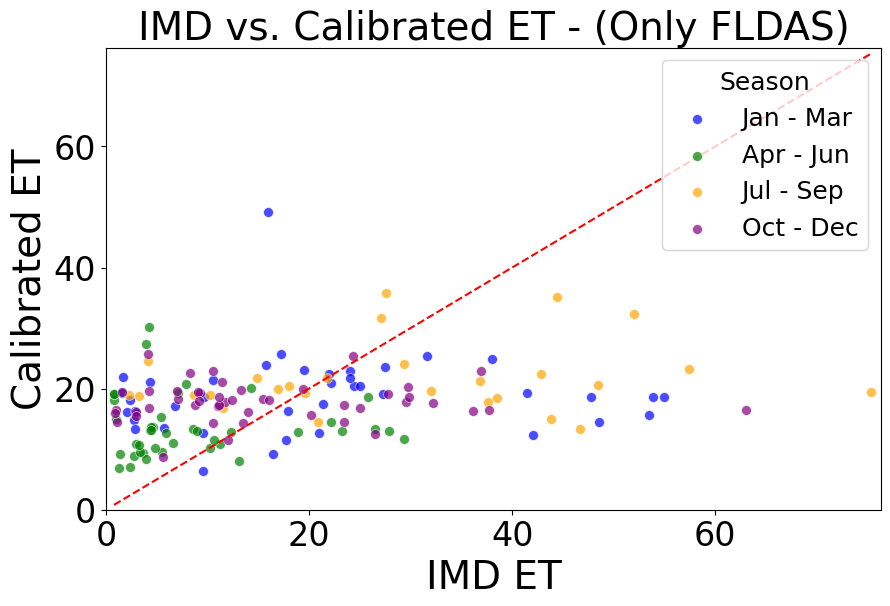

AEZ-4
**********************************
Average RMSE:  10.160654929331486
Average NRMSE:  0.2539227634458345
Average R-squared:  0.17666039415628612
Average Pearson Correlation:  0.39840861743672396
Coefficients: 0.0 0.6320713496244064 -0.04412849183753186 156.08108701520337 0.19706608024601718 0.05536687592939602 
Intercepts:  3.9486787391412412
Average p-values: 0.2561565992926739 0.00031892050248987473 0.6881244459775259 0.5825405036897779 0.004539318740192035 0.23634955960480553 
Average Training Points:  262
Average Testing Points:  65
Standard Errors: 3.163983999393378 0.1481028892025677 0.11677817367630614 253.55071191974633 0.06271897426288034 0.04216699223841617 
**********************************




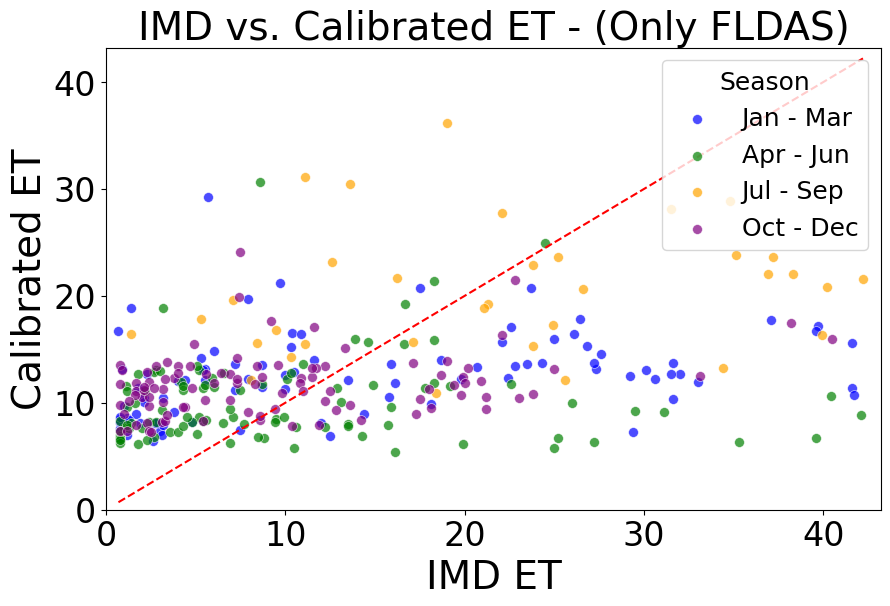

AEZ-5
**********************************
Average RMSE:  16.241663978761
Average NRMSE:  0.37083427935274216
Average R-squared:  0.10237079916175931
Average Pearson Correlation:  0.23440649204915393
Coefficients: 0.0 -0.9250291059694252 -1.7898994982967036 -186.57837378432592 1.0684452478273514 -0.07945865846802316 
Intercepts:  64.55664331300818
Average p-values: 0.007080807983392741 0.2954111356603814 0.04261197086446171 0.659925464424291 0.3015335563852478 0.6026636705369507 
Average Training Points:  40
Average Testing Points:  10
Standard Errors: 19.93544514445693 0.8088397791428192 0.7864508786224935 1276.0035903817702 0.9228988501770328 0.14086491733407974 
**********************************




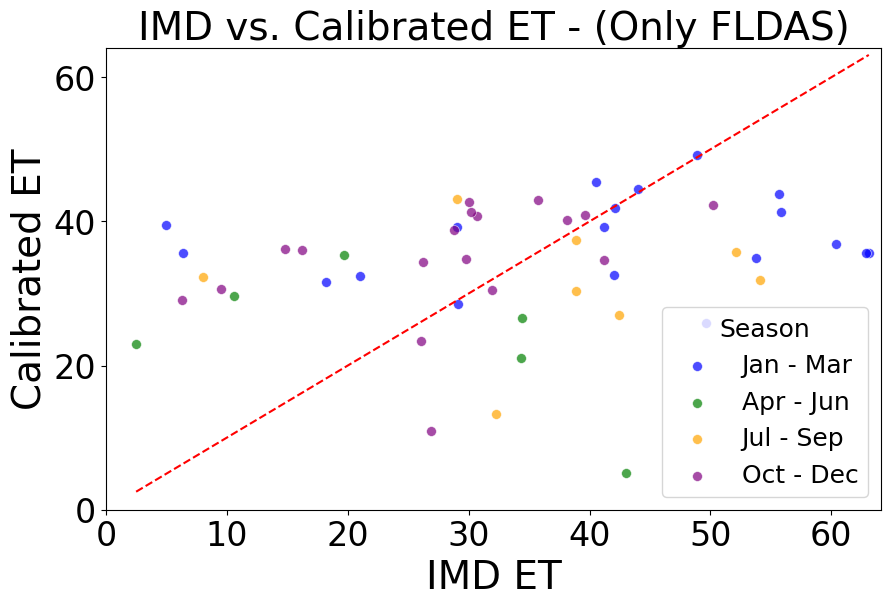

AEZ-9
**********************************
Average RMSE:  32.86751153094641
Average NRMSE:  0.48915877672487074
Average R-squared:  0.03339095785635657
Average Pearson Correlation:  -0.02986917519028067
Coefficients: 0.0 2.0121939143821725 0.0803547989999542 -166.62104393051862 -0.9485312471248448 -1.3520936280241411 
Intercepts:  35.42440504477179
Average p-values: 0.28485818436566646 0.12769415841888548 0.5676593965152865 0.6165009017426655 0.45083858450664704 0.6841470563463038 
Average Training Points:  38
Average Testing Points:  9
Standard Errors: 28.803671080325678 1.2324022588359265 0.8103056743110049 2321.421916558439 1.4805719429529351 3.2853926292786624 
**********************************




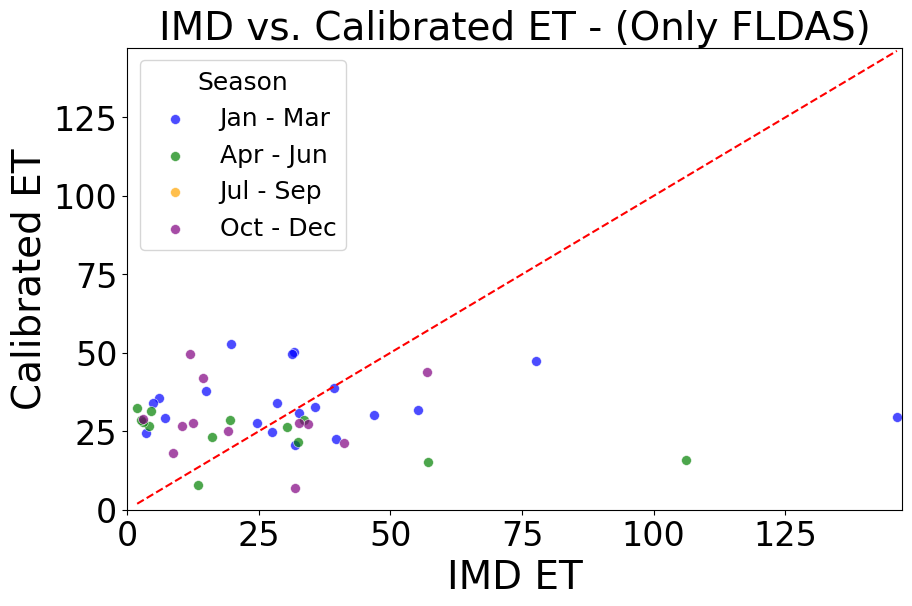

AEZ-10
**********************************
Average RMSE:  10.2566230769286
Average NRMSE:  0.300425408825697
Average R-squared:  0.488204371099069
Average Pearson Correlation:  0.6814918614008356
Coefficients: 0.0 0.8362536573265045 -1.253087827057071 1960.4290210364584 -0.6920255374304751 -0.14278813976985164 
Intercepts:  43.0073122516798
Average p-values: 8.456083778605423e-05 0.028644644374704775 0.00022540440793059117 0.05039287166794042 0.09204117790732307 0.5302896527246347 
Average Training Points:  41
Average Testing Points:  10
Standard Errors: 9.523941169418208 0.28029536702260016 0.29626999060843706 918.6220696819446 0.3647819221875624 0.35669983261322724 
**********************************




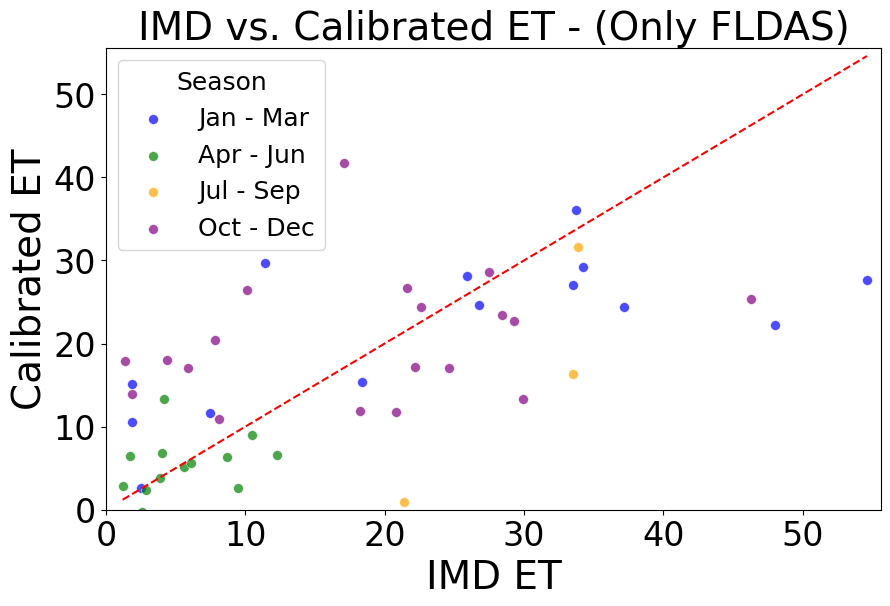

AEZ-11
**********************************
Average RMSE:  10.125404687292232
Average NRMSE:  0.28601593641487816
Average R-squared:  0.06735597024390022
Average Pearson Correlation:  0.2312586740193076
Coefficients: 0.0 -0.6407780821742199 -0.3171246899153891 810.2653761398923 0.36633763813221953 -0.046454834164743976 
Intercepts:  28.52315333565383
Average p-values: 0.000500788813846563 0.015384233534380402 0.2443632593361828 0.1685819237987863 0.22759446601330188 0.4908134124964477 
Average Training Points:  99
Average Testing Points:  24
Standard Errors: 7.590824869730159 0.24931796242241816 0.2563924323085657 565.8400141692485 0.28721557183131374 0.06694227828949353 
**********************************




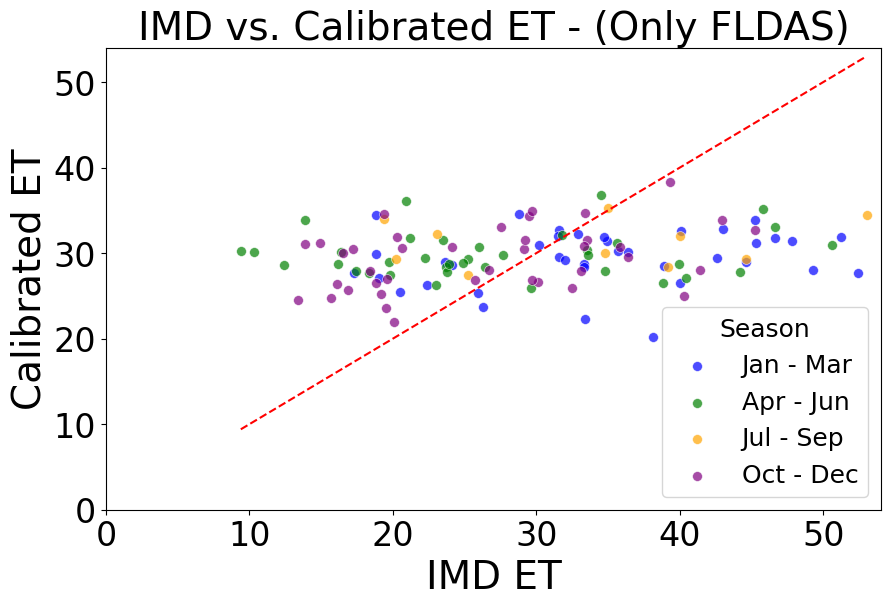

AEZ-13
**********************************
Average RMSE:  8.069498947909775
Average NRMSE:  0.25059602820693994
Average R-squared:  0.2762629729056448
Average Pearson Correlation:  0.5132959838017777
Coefficients: 0.0 0.4632493827943489 0.3048484273184001 597.4495310288072 0.030271070372634268 0.005295612451430141 
Intercepts:  -2.4176830942438317
Average p-values: 0.5776983874772589 0.07984928569811427 0.08361252257883926 0.17234877775652946 0.6213634624834156 0.7887680907339569 
Average Training Points:  106
Average Testing Points:  26
Standard Errors: 4.55517489268148 0.24328897606308492 0.15605669791936955 388.3324704792941 0.16185805201919232 0.10162377496985661 
**********************************




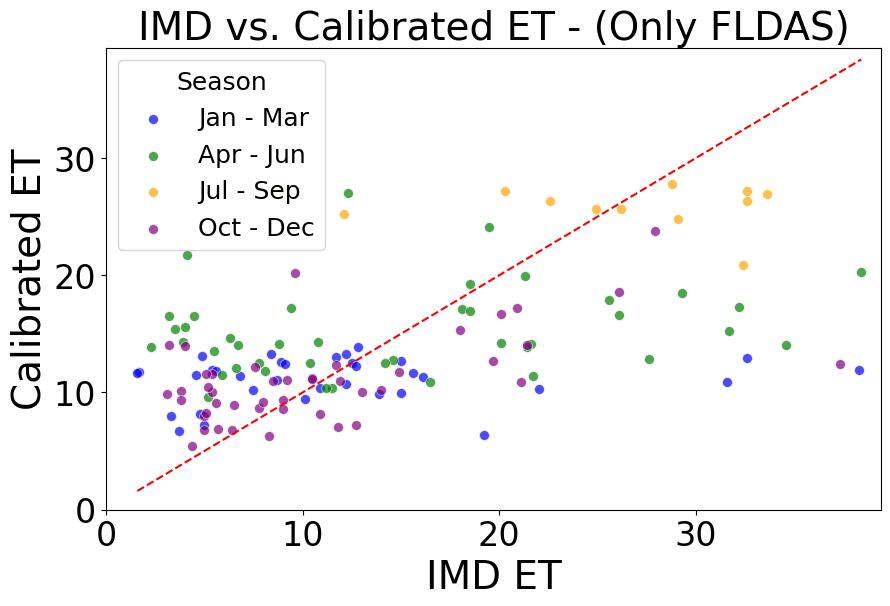

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold

import numpy as np
import statsmodels.api as sm
# Combine the feature lists into a single 2D array
columns_to_read = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture','Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']
columns_to_replace = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

file_path = # Replace with the file path for the ET_Version_2 file in this repository

locations = ['AEZ-2', 'AEZ-4', 'AEZ-5', 'AEZ-9', 'AEZ-10', 'AEZ-11', 'AEZ-13']

for loc in locations:
  print(loc)

  # Read excel sheet and only the columns that we want
  df = pd.read_excel(file_path, sheet_name=loc, usecols=columns_to_read)

  # Dharmisha's logic for removing unneeded rows
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)

  # Following is code for removing outliers
  # ================= OUTLIER REMOVAL STARTS ================
  line_mean = df['Downscaled ET'].mean(skipna=True)
  line_std = df['Downscaled ET'].std(skipna=True)
  point_mean = df['IMD ET'].mean(skipna=True)
  point_std = df['IMD ET'].std(skipna=True)

  # Create a mask for outliers
  outlier_mask = (np.abs(df['IMD ET']) > point_mean + 2*point_std) | (np.abs(df['IMD ET']) < point_mean - 2*point_std)

  df.loc[outlier_mask, ['IMD ET']] = 0
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)
# # ================= OUTLIER REMOVAL ENDS ================


#     # Before Calibration stats =================================

#   y_test = df['IMD ET']
#   y_pred = df['Downscaled ET']

#   rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#   # rmse_scores.append(rmse)

#   # NRMSE
#   nrmse = rmse / (y_test.max() - y_test.min())
#   # nrmse_scores.append(nrmse)

#   # R-squared
#   corr_matrix = np.corrcoef(y_test, y_pred)
#   corr = corr_matrix[0,1]
#   R_sq = corr**2
#   # r2_scores.append(R_sq)

#   # Pearson correlation coefficient
#   pearson_corr, _ = pearsonr(y_test, y_pred)
#   # pearson_scores.append(pearson_corr)

#   print("Average RMSE: ", rmse)
#   print("Average NRMSE: ", nrmse)
#   print("Average R-squared: ", R_sq)
#   print("Average Pearson Correlation: ", pearson_corr)
#   print("=======================================\n\n")
#     # =================================================


  # Only FLDAS
  X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation']

  # FLDAS + MET
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

  y_column = 'IMD ET'
  date_column = 'Date'

  X = df[X_columns].values
  y = df[y_column].values
  dates = df[date_column].values

  k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

  rmse_scores = []
  nrmse_scores = []
  r2_scores = []
  pearson_scores = []
  intercepts = []
  coefficients = []
  p_values_list = []
  standard_errors = []

  imd_et = []
  calibrated_et = []
  date_et = []

  training_points = 0
  testing_points = 0
  count=0

  for train_index, test_index in k_folds.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      training_points += len(X[train_index])
      testing_points += len(X[test_index])
      count+=1

      dates_train = dates[train_index]
      dates_test = list(dates[test_index])

      degree = 1  # You can change the degree to the desired polynomial degree
      model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      # RMSE
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      rmse_scores.append(rmse)

      # NRMSE
      nrmse = rmse / (y_test.max() - y_test.min())
      nrmse_scores.append(nrmse)

      # R-squared
      corr_matrix = np.corrcoef(y_test, y_pred)
      corr = corr_matrix[0,1]
      R_sq = corr**2
      r2_scores.append(R_sq)

      # Pearson correlation coefficient
      pearson_corr, _ = pearsonr(y_test, y_pred)
      pearson_scores.append(pearson_corr)

      coefficient = model.named_steps['linearregression'].coef_.tolist()
      intercept = model.named_steps['linearregression'].intercept_.tolist()

      coefficients.append(coefficient)
      intercepts.append(intercept)

      imd_et += list(y_test)
      calibrated_et += list(y_pred)
      date_et += list(dates_test)

      X_train_sm = sm.add_constant(X_train)  # Adds a constant term to the predictor
      sm_model = sm.OLS(y_train, X_train_sm).fit()
      p_values = sm_model.pvalues
      standard_error = sm_model.bse
      standard_errors.append(standard_error)
      p_values_list.append(p_values)

  # Calculate average scores
  average_rmse = np.mean(rmse_scores)
  average_nrmse = np.mean(nrmse_scores)
  average_r2 = np.mean(r2_scores)
  average_pearson = np.mean(pearson_scores)

  print("**********************************")

  print("Average RMSE: ", average_rmse)
  print("Average NRMSE: ", average_nrmse)
  print("Average R-squared: ", average_r2)
  print("Average Pearson Correlation: ", average_pearson)

  data_array = np.array(intercepts)
  column_means = np.mean(data_array, axis=0)
  intercepts = column_means.tolist()

  data_array = np.array(coefficients)
  column_means = np.mean(data_array, axis=0)
  coefficients = column_means.tolist()

  data_array = np.array(standard_errors)
  column_means = np.mean(data_array, axis=0)
  standard_errors = column_means.tolist()

  print("Coefficients: ", end="")
  for c in coefficients:
    print(c,end=" ")
  print()
  print("Intercepts: ", intercepts)

  # Calculate average p-values
  average_p_values = np.mean(p_values_list, axis=0)
  print("Average p-values: ", end="")
  for c in average_p_values:
    print(c,end=" ")
  print("\nAverage Training Points: ", training_points//count)
  print("Average Testing Points: ", testing_points//count)

  print("Standard Errors: ", end="")
  for c in standard_errors:
    print(c,end=" ")
  print()
  print("**********************************")
  print()
  print()
  graphing(imd_et, calibrated_et, date_et, loc, X_columns, aezimages)

# Calibration using Lasso and Ridge Regularization Techniques

## Lasso and Ridge Regression + K fold (5)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr



columns_to_read = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture','Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']
columns_to_replace = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

file_path = # Replace with the file path for the ET_Version_2 file in this repository

locations = ['Dantiwada (AEZ-2)' , 'Jodhpur (AEZ-2)', 'Durgapura (AEZ-4)', 'Jhansi (AEZ-4)', 'New Delhi (AEZ-4)', 'Rajkot (AEZ-4)', 'Anand (AEZ-5)', 'Bikramganj (AEZ-9)', 'Varanasi (AEZ-9)', 'Bhopal (AEZ-10)', 'Raipur (AEZ-11)', 'Lucknow (AEZ-13)']
aezs = ['AEZ-2', 'AEZ-4', 'AEZ-5', 'AEZ-9', 'AEZ-10', 'AEZ-11', 'AEZ-13']

def evaluate_model(model, alphas, X, y, location):
    results = []
    for alpha in alphas:
        fold_results = {
            'location': location,
            'alpha': alpha,
            'coefficients': [],
            'rmse': [],
            'nrmse': [],
            'r2': [],
            'pearson': []
        }

        model.set_params(alpha=alpha)

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            nrmse = rmse / (y_test.max() - y_test.min())
            corr_matrix = np.corrcoef(y_test, y_pred)
            corr = corr_matrix[0,1]
            r2 = corr**2
            pearson_corr, _ = pearsonr(y_test, y_pred)

            fold_results['coefficients'].append(model.coef_)
            fold_results['rmse'].append(rmse)
            fold_results['nrmse'].append(nrmse)
            fold_results['r2'].append(r2)
            fold_results['pearson'].append(pearson_corr)

        results.append(fold_results)
    return results


def print_results(results):
    for res in results:
        alpha = res['alpha']
        coefficients = np.mean(res['coefficients'], axis=0)
        rmse = np.mean(res['rmse'])
        nrmse = np.mean(res['nrmse'])
        r2 = np.mean(res['r2'])
        pearson = np.mean(res['pearson'])

        print(f"Alpha: {alpha}")
        print(f"Coefficients: {coefficients}")
        print(f"RMSE: {rmse}")
        print(f"NRMSE: {nrmse}")
        print(f"R2: {r2}")
        print(f"Pearson: {pearson}")
        print('-' * 30)

ridge_model = Ridge()
lasso_model = Lasso(max_iter=10000)


ridge_alphas = np.logspace(-3, 3, 7)
lasso_alphas = np.logspace(-4, 1, 6)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_results = []

for loc in locations:
  print(loc)

  # Read excel sheet and only the columns that we want
  df = pd.read_excel(file_path, sheet_name=loc, usecols=columns_to_read)

  # Dharmisha's logic for removing unneeded rows
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)

  # Following is code for removing outliers
  # ================= OUTLIER REMOVAL STARTS ================
  line_mean = df['Downscaled ET'].mean(skipna=True)
  line_std = df['Downscaled ET'].std(skipna=True)
  point_mean = df['IMD ET'].mean(skipna=True)
  point_std = df['IMD ET'].std(skipna=True)

  # Create a mask for outliers
  outlier_mask = (np.abs(df['IMD ET']) > point_mean + 2*point_std) | (np.abs(df['IMD ET']) < point_mean - 2*point_std)

  df.loc[outlier_mask, ['IMD ET']] = 0
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)
  # ================= OUTLIER REMOVAL ENDS ================

  # Only FLDAS
  X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation']

  # FLDAS + MET
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

  y_column = 'IMD ET'
  date_column = 'Date'

  X = df[X_columns].values
  y = df[y_column].values
  dates = df[date_column].values


  ridge_results = evaluate_model(ridge_model, ridge_alphas, X, y, loc)
  lasso_results = evaluate_model(lasso_model, lasso_alphas, X, y, loc)
  all_results.extend(ridge_results)
  all_results.extend(lasso_results)

def aggregate_results(results):
    aggregated_data = {
        'location': [],
        'alpha': [],
        'rmse': [],
        'nrmse': [],
        'r2': [],
        'pearson': []
    }
    num_features = len(results[0]['coefficients'][0])
    for i in range(num_features):
        aggregated_data[f'coef_{i}'] = []

    for res in results:
        location = res['location']
        alpha = res['alpha']
        coefficients = np.mean(res['coefficients'], axis=0)
        rmse = np.mean(res['rmse'])
        nrmse = np.mean(res['nrmse'])
        r2 = np.mean(res['r2'])
        pearson = np.mean(res['pearson'])

        aggregated_data['location'].append(location)
        aggregated_data['alpha'].append(alpha)
        aggregated_data['rmse'].append(rmse)
        aggregated_data['nrmse'].append(nrmse)
        aggregated_data['r2'].append(r2)
        aggregated_data['pearson'].append(pearson)

        for i in range(num_features):
            aggregated_data[f'coef_{i}'].append(coefficients[i])

    return pd.DataFrame(aggregated_data)

results_df = aggregate_results(all_results)
results_df.to_csv('all_locations_results.csv', index=False)

print("All results saved to 'all_locations_results.csv'")




## Lasso and Ridge + K fold + P value and Std err


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import statsmodels.api as sm
import math



columns_to_read = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture','Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']
columns_to_replace = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

file_path = # Replace with the file path for the ET_Version_2 file in this repository

# Function to evaluate models and calculate metrics for a single location
def evaluate_models(location_id, X, y, dates, ridge_alphas, lasso_alphas):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    def evaluate_model(model, alphas):
        results = []
        for alpha in alphas:
            fold_results = {
                'location': location_id,
                'alpha': alpha,
                'coefficients': [],
                'std_err': [],
                'rmse': [],
                'nrmse': [],
                'r2': [],
                'pearson': [],
                'p_values': [],
                'y_pred': [],
                'y_test': [],
                'date_test': []
            }

            model.set_params(alpha=alpha)

            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]


                dates_train = dates[train_index]
                dates_test = list(dates[test_index])

                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                nrmse = rmse / (y_test.max() - y_test.min())
                # r2 = r2_score(y_test, y_pred)

                corr_matrix = np.corrcoef(y_test, y_pred)
                corr = corr_matrix[0,1]
                r2 = corr**2

                pearson_corr, _ = pearsonr(y_test, y_pred)

                # Using statsmodels for obtaining p-values and standard errors
                X_train_sm = sm.add_constant(X_train)  # Adding intercept term
                model_sm = sm.OLS(y_train, X_train_sm)
                results_sm = model_sm.fit()
                p_values = results_sm.pvalues[1:]  # Exclude intercept p-value
                std_err = results_sm.bse[1:]  # Standard errors excluding intercept

                fold_results['coefficients'].append(model.coef_)
                fold_results['std_err'].append(std_err)
                fold_results['rmse'].append(rmse)
                fold_results['nrmse'].append(nrmse)
                fold_results['r2'].append(r2)
                fold_results['pearson'].append(pearson_corr)
                fold_results['p_values'].append(p_values)
                fold_results['y_pred'].extend(y_pred)
                fold_results['y_test'].extend(y_test)
                fold_results['date_test'].extend(dates_test)

            results.append(fold_results)
        return results

    # Evaluate Ridge Regression
    ridge_model = Ridge()
    ridge_results = evaluate_model(ridge_model, ridge_alphas)

    # Evaluate Lasso Regression
    lasso_model = Lasso(max_iter=10000)
    lasso_results = evaluate_model(lasso_model, lasso_alphas)

    # Calculate average metrics across folds and identify best model
    def calculate_average_metrics(results):
        avg_results = {
            'location': [],
            'alpha': [],
            'avg_rmse': [],
            'avg_nrmse': [],
            'avg_r2': [],
            'avg_pearson': [],
            'avg_p_values': [],
            'avg_std_err': [],
            'avg_coefficients': []
        }

        best_rmse = float('inf')
        best_nrmse = float('inf')
        best_r2 = float('inf')
        best_pearson = float(-1)
        best_y_pred = None
        best_y_test = None
        best_alpha = None
        best_stats = float('inf')
        best_dates = None

        for res in results:
            location = res['location']
            alpha = res['alpha']
            avg_rmse = np.mean(res['rmse'])
            avg_nrmse = np.mean(res['nrmse'])
            avg_r2 = np.mean(res['r2'])
            avg_pearson = np.mean(res['pearson'])
            avg_p_values = np.mean(res['p_values'], axis=0)  # Average p-values across folds
            avg_std_err = np.mean(res['std_err'], axis=0)  # Average standard errors across folds
            avg_coefficients = np.mean(res['coefficients'], axis=0)  # Average coefficients across folds

            avg_results['location'].append(location)
            avg_results['alpha'].append(alpha)
            avg_results['avg_rmse'].append(avg_rmse)
            avg_results['avg_nrmse'].append(avg_nrmse)
            avg_results['avg_r2'].append(avg_r2)
            avg_results['avg_pearson'].append(avg_pearson)
            avg_results['avg_p_values'].append(avg_p_values)
            avg_results['avg_std_err'].append(avg_std_err)
            avg_results['avg_coefficients'].append(avg_coefficients)


            if (not(math.isnan(avg_r2)) and not(math.isnan(avg_pearson))):
                # curr_stats = (avg_r2 * avg_pearson)/(avg_rmse * avg_nrmse)

                # if curr_stats > 0 and best_stats > curr_stats:
                if best_pearson < avg_pearson:
                  best_rmse = avg_rmse
                  best_y_pred = res['y_pred']
                  best_y_test = res['y_test']
                  best_dates = res['date_test']
                  best_alpha = alpha
                  best_r2 = avg_r2
                  best_pearson = avg_pearson
                  best_nrmse = avg_nrmse

        return pd.DataFrame(avg_results), best_y_pred, best_y_test, best_alpha, best_dates, best_rmse, best_nrmse, best_r2, best_pearson

    ridge_avg_metrics, ridge_best_y_pred, ridge_best_y_test, ridge_best_alpha, ridge_best_dates, ridge_best_rmse, ridge_best_nrmse, ridge_best_r2, ridge_best_pearson = calculate_average_metrics(ridge_results)
    lasso_avg_metrics, lasso_best_y_pred, lasso_best_y_test, lasso_best_alpha, lasso_best_dates, lasso_best_rmse, lasso_best_nrmse, lasso_best_r2, lasso_best_pearson = calculate_average_metrics(lasso_results)

    return ridge_avg_metrics, lasso_avg_metrics, ridge_best_y_pred, ridge_best_y_test, lasso_best_y_pred, lasso_best_y_test, ridge_best_alpha, lasso_best_alpha, ridge_best_dates, lasso_best_dates, ridge_best_rmse, ridge_best_nrmse, ridge_best_r2, ridge_best_pearson,  lasso_best_rmse, lasso_best_nrmse, lasso_best_r2, lasso_best_pearson


AEZ-2


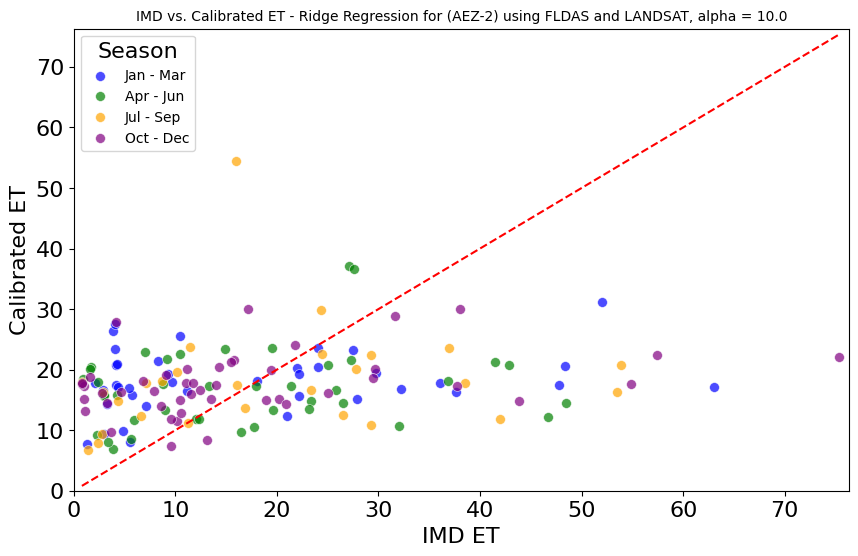

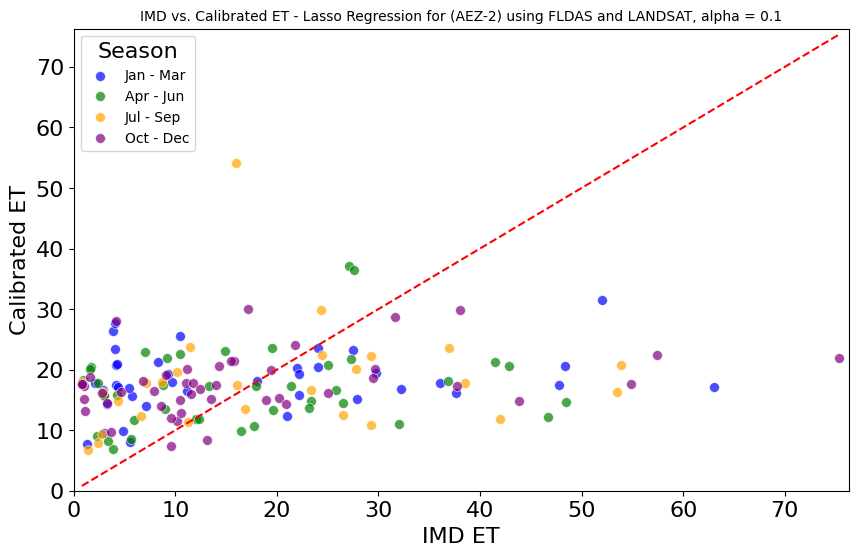

AEZ-4


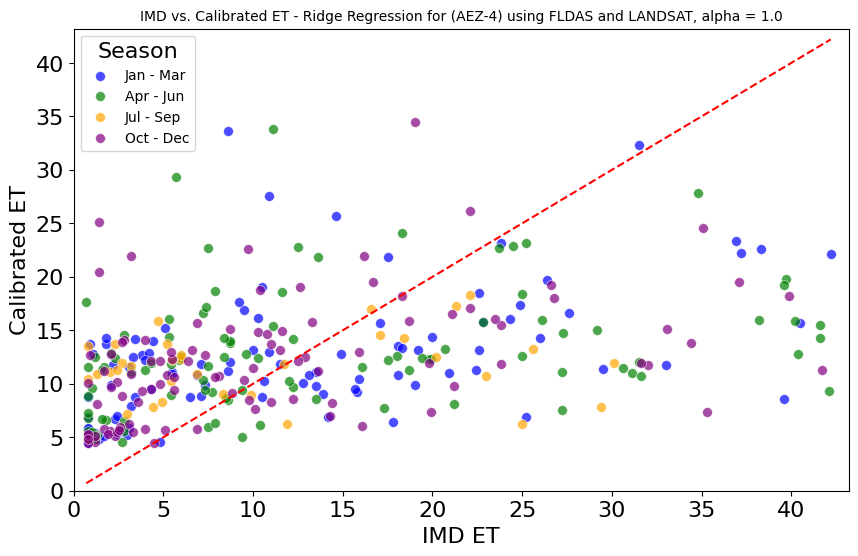

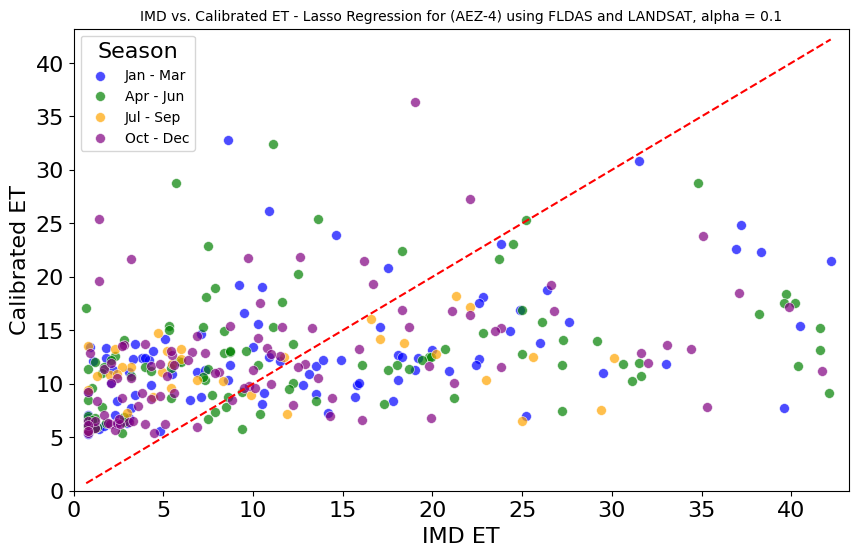

AEZ-5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.985e+03, tolerance: 9.040e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+00, tolerance: 1.010e+00
  model = cd_fast.enet_coordinate_descent(


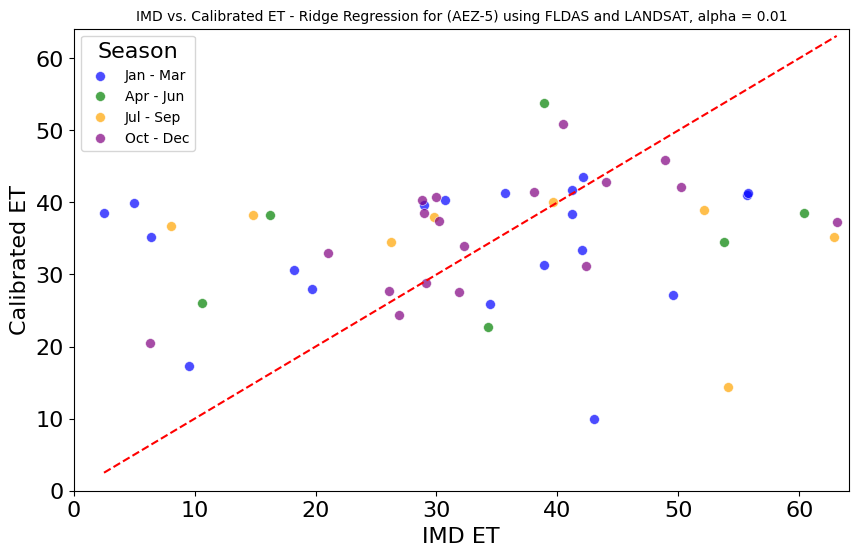

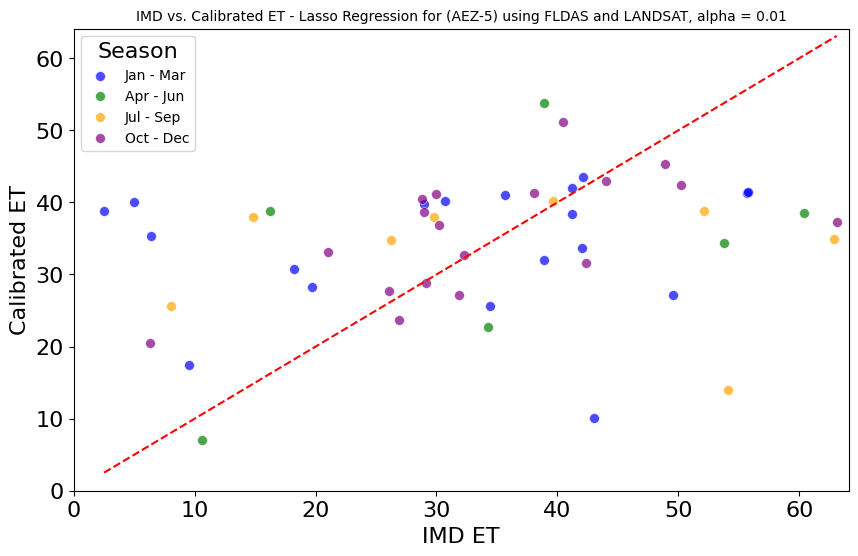

AEZ-9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+02, tolerance: 2.397e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.172e+02, tolerance: 1.761e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.274e+00, tolerance: 2.397e

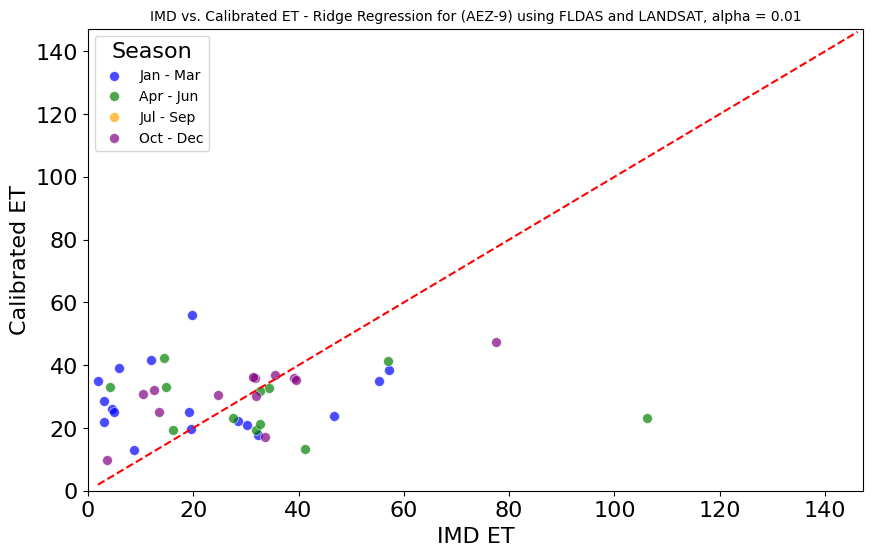

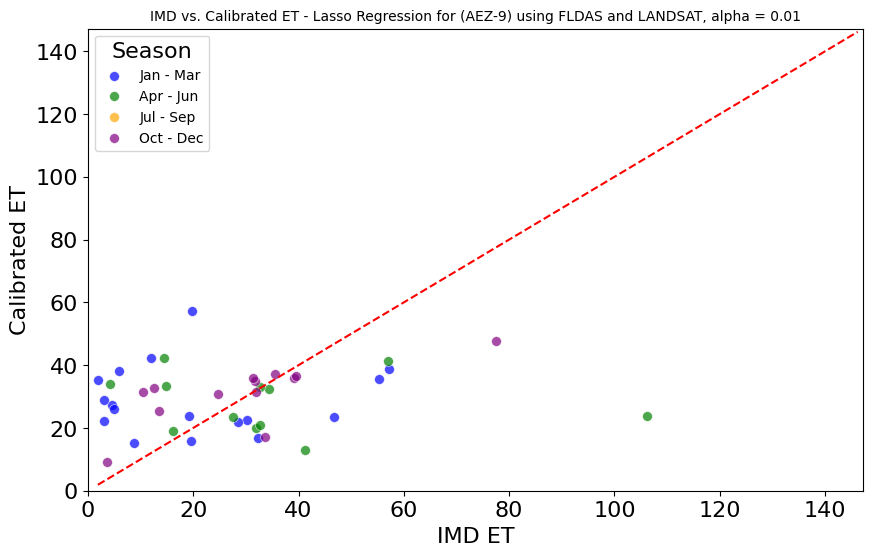

AEZ-10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+03, tolerance: 8.822e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.476e+02, tolerance: 5.605e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.349e+03, tolerance: 7.704e

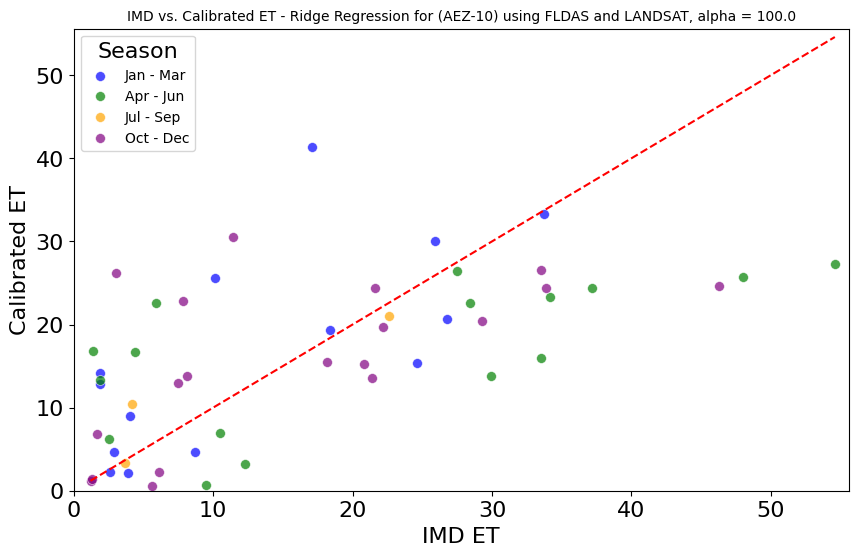

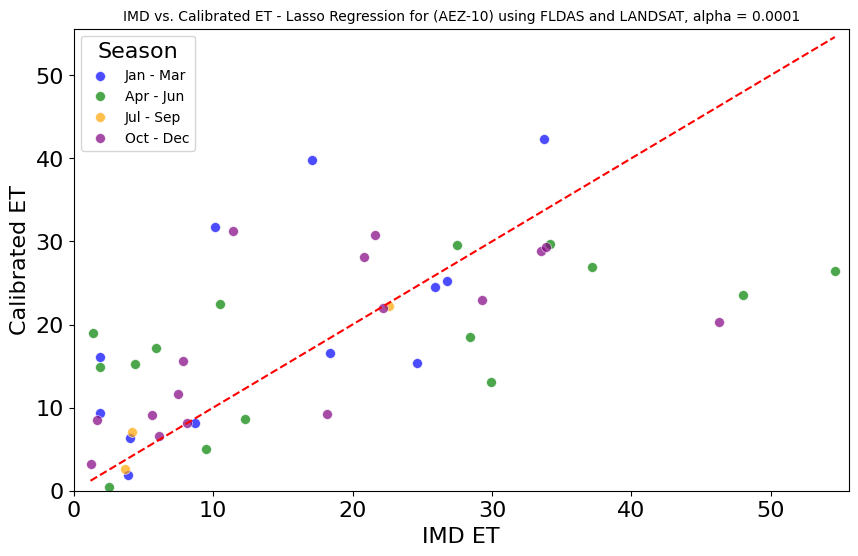

AEZ-11


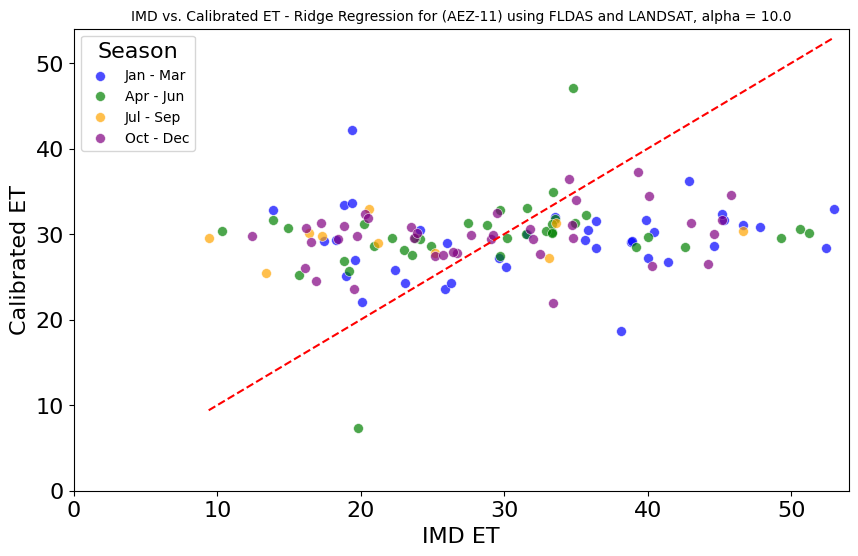

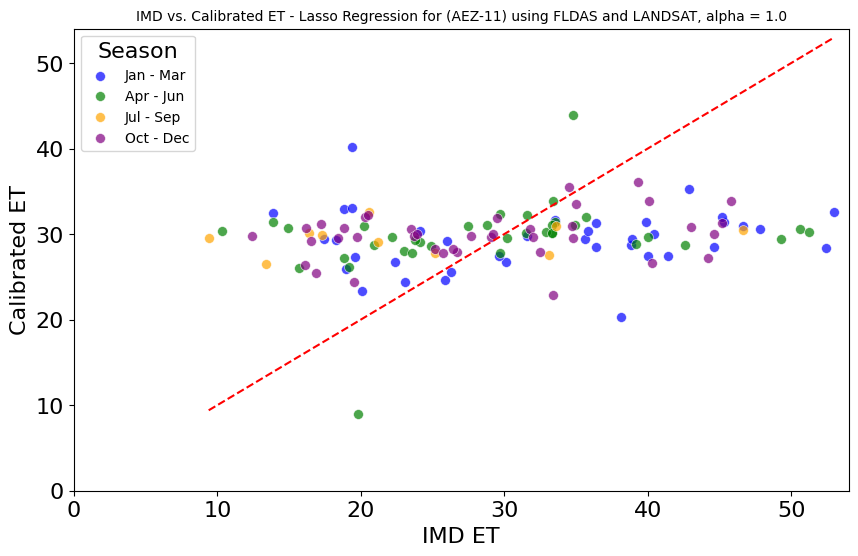

AEZ-13


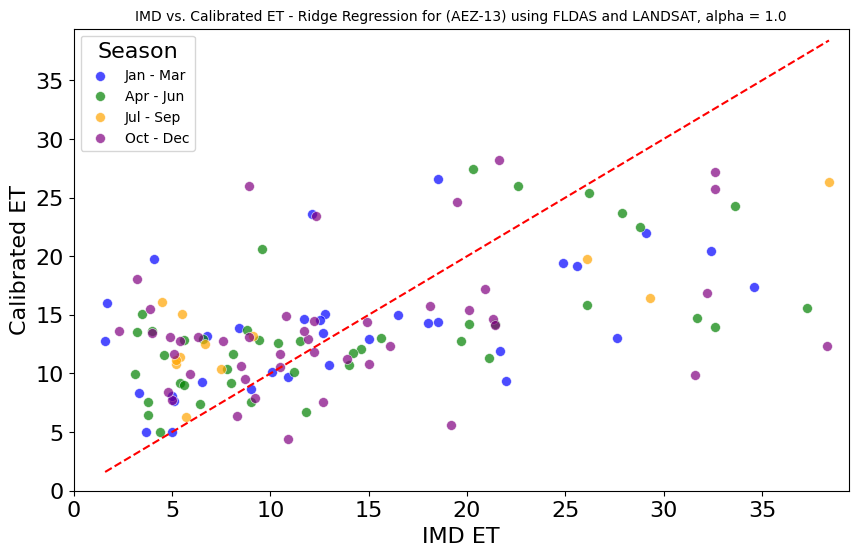

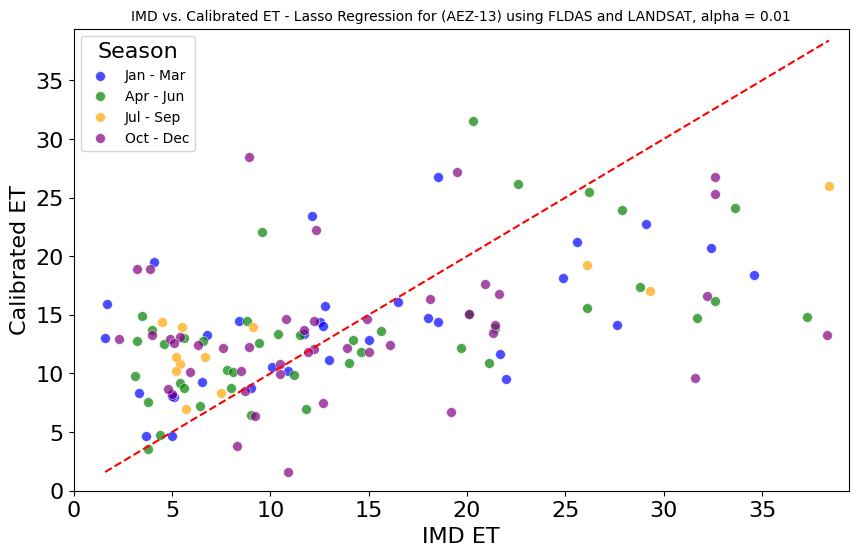

Ridge results for all locations saved to 'ridge_results_all_locations.csv'
Lasso results for all locations saved to 'lasso_results_all_locations.csv'
Ridge predictions for best models saved to 'ridge_y_pred_best_models.csv'
Lasso predictions for best models saved to 'lasso_y_pred_best_models.csv'


In [ ]:
all_ridge_results = []
all_lasso_results = []
all_ridge_y_pred = []
all_lasso_y_pred = []
locations = ['Dantiwada (AEZ-2)', 'Jodhpur (AEZ-2)', 'Durgapura (AEZ-4)', 'Jhansi (AEZ-4)', 'New Delhi (AEZ-4)', 'Rajkot (AEZ-4)', 'Anand (AEZ-5)', 'Bikramganj (AEZ-9)', 'Varanasi (AEZ-9)', 'Bhopal (AEZ-10)', 'Raipur (AEZ-11)', 'Lucknow (AEZ-13)']
aezs = ['AEZ-2', 'AEZ-4', 'AEZ-5', 'AEZ-9', 'AEZ-10', 'AEZ-11', 'AEZ-13']
for location_id in aezs:
  print(location_id)

  # Read excel sheet and only the columns that we want
  df = pd.read_excel(file_path, sheet_name=location_id, usecols=columns_to_read)

  # Dharmisha's logic for removing unneeded rows
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)
  # print(df.shape[0])
  # Following is code for removing outliers
  # ================= OUTLIER REMOVAL STARTS ================
  line_mean = df['Downscaled ET'].mean(skipna=True)
  line_std = df['Downscaled ET'].std(skipna=True)
  point_mean = df['IMD ET'].mean(skipna=True)
  point_std = df['IMD ET'].std(skipna=True)

  # Create a mask for outliers
  outlier_mask = (np.abs(df['IMD ET']) > point_mean + 2*point_std) | (np.abs(df['IMD ET']) < point_mean - 2*point_std)

  df.loc[outlier_mask, ['IMD ET']] = 0
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)
  # ================= OUTLIER REMOVAL ENDS ================

  # Only FLDAS
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation']
  # FLDAS + MET
  X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']


  # FLDAS + MET
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

  y_column = 'IMD ET'
  date_column = 'Date'

  X = df[X_columns].values
  y = df[y_column].values
  dates = df[date_column].values

  ridge_alphas_location = np.logspace(-3, 2, 6)
  lasso_alphas_location = np.logspace(-4, 0, 5)

  # Evaluate models and collect results for the current location
  ridge_results, lasso_results, ridge_y_pred, ridge_y_test, lasso_y_pred, lasso_y_test, ridge_alpha, lasso_alpha, ridge_dates, lasso_dates, ridge_rmse, ridge_nrmse, ridge_r2, ridge_pearson, lasso_rmse, lasso_nrmse, lasso_r2, lasso_pearson = evaluate_models(location_id, X, y, dates, ridge_alphas_location, lasso_alphas_location)
  all_ridge_results.append(ridge_results)
  all_lasso_results.append(lasso_results)
  all_ridge_y_pred.extend([(location_id, ridge_alpha, date, test, pred, ridge_rmse, ridge_nrmse, ridge_r2, ridge_pearson) for test, pred, date in zip(ridge_y_test, ridge_y_pred, ridge_dates)])
  all_lasso_y_pred.extend([(location_id, lasso_alpha, date, test, pred, lasso_rmse, lasso_nrmse, lasso_r2, lasso_pearson) for test, pred, date in zip(lasso_y_test, lasso_y_pred, lasso_dates)])

  graphing(ridge_y_test, ridge_y_pred, dates, location_id, X_columns, locationimages)
  graphing(lasso_y_test, lasso_y_pred, dates, location_id, X_columns, aezimages)

# Concatenate results for all locations
all_ridge_results = pd.concat(all_ridge_results)
all_lasso_results = pd.concat(all_lasso_results)

# Save the results to CSV
all_ridge_results.to_csv('AEZ_ridge_results_all_locations_fldas_landsat.csv', index=False)
all_lasso_results.to_csv('AEZ_lasso_results_all_locations_fldas_landsat.csv', index=False)

# Save the predictions for the best models to CSV
ridge_y_pred_df = pd.DataFrame(all_ridge_y_pred, columns=['location', 'alpha', 'dates', 'y_test', 'y_pred','rmse', 'nrmse', 'r2','pearson'])
lasso_y_pred_df = pd.DataFrame(all_lasso_y_pred, columns=['location', 'alpha', 'dates', 'y_test', 'y_pred', 'rmse', 'nrmse', 'r2','pearson'])

ridge_y_pred_df.to_csv('AEZ_ridge_y_pred_best_models_fldas_landsat.csv', index=False)
lasso_y_pred_df.to_csv('AEZ_lasso_y_pred_best_models_fldas_landsat.csv', index=False)

print("Ridge results for all locations saved to 'ridge_results_all_locations.csv'")
print("Lasso results for all locations saved to 'lasso_results_all_locations.csv'")
print("Ridge predictions for best models saved to 'ridge_y_pred_best_models.csv'")
print("Lasso predictions for best models saved to 'lasso_y_pred_best_models.csv'")

In [ ]:
%mv /content/ /content/drive/MyDrive/MTP_IITD/

mv: inter-device move failed: '/' to '/content/drive/MyDrive/MTP_IITD'; unable to remove target: Directory not empty


# Calibration using Support Vector Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from scipy.stats import pearsonr
import statsmodels.api as sm
import math

columns_to_read = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation', 'MSAVI', 'NDMI', 'NDVI', 'SAVI', 'NDBI', 'NDIIB7', 'ALBEDO', 'LST']
columns_to_replace = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'MSAVI', 'NDMI', 'NDVI', 'SAVI', 'NDBI', 'NDIIB7', 'ALBEDO', 'LST']

file_path = '/content/ET_Version_2.xlsx'  # Replace with your actual file path

# Function to evaluate models and calculate metrics for a single location
def evaluate_models(location_id, X, y, dates, svr_kernels, svr_Cs):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    def evaluate_model(model, param_name, param_values, kernel):
        results = []
        for value in param_values:
            fold_results = {
                'location': location_id,
                param_name: value,
                'std_err': [],
                'rmse': [],
                'nrmse': [],
                'mae': [],
                'mse': [],
                'mape': [],
                'explained_variance': [],
                'r2': [],
                'pearson': [],
                'y_pred': [],
                'y_test': [],
                'date_test': [],
                'kernel': kernel,
                'coefficients': []
            }

            model.set_params(**{param_name: value})

            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                dates_train = dates[train_index]
                dates_test = list(dates[test_index])

                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                nrmse = rmse / (y_test.max() - y_test.min())
                # r2 = r2_score(y_test, y_pred)

                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
                explained_variance = explained_variance_score(y_test, y_pred)

                corr_matrix = np.corrcoef(y_test, y_pred)
                corr = corr_matrix[0,1]
                r2 = corr**2

                pearson_corr, _ = pearsonr(y_test, y_pred)

                # Using statsmodels for obtaining p-values and standard errors
                X_train_sm = sm.add_constant(X_train)  # Adding intercept term
                model_sm = sm.OLS(y_train, X_train_sm)
                results_sm = model_sm.fit()
                p_values = results_sm.pvalues[1:]  # Exclude intercept p-value
                std_err = results_sm.bse[1:]  # Standard errors excluding intercept

                fold_results['std_err'].append(std_err)
                fold_results['rmse'].append(rmse)
                fold_results['nrmse'].append(nrmse)
                fold_results['mae'].append(mae)
                fold_results['mse'].append(mse)
                fold_results['mape'].append(mape)
                fold_results['explained_variance'].append(explained_variance)
                fold_results['r2'].append(r2)
                fold_results['pearson'].append(pearson_corr)
                fold_results['y_pred'].extend(y_pred)
                fold_results['y_test'].extend(y_test)
                fold_results['date_test'].extend(dates_test)

                if kernel == 'linear':
                    fold_results['coefficients'].append(model.coef_)

            results.append(fold_results)
        return results

    # Evaluate SVR with different kernels
    svr_results = []
    for kernel in svr_kernels:
        svr_model = SVR(kernel=kernel)
        svr_results.extend(evaluate_model(svr_model, 'C', svr_Cs, kernel))

    # Calculate average metrics across folds and identify best model
    def calculate_average_metrics(results):
        avg_results = {
            'location': [],
            'param': [],
            'avg_rmse': [],
            'avg_nrmse': [],
            'avg_mae': [],
            'avg_mse': [],
            'avg_mape': [],
            'avg_explained_variance': [],
            'avg_r2': [],
            'avg_pearson': [],
            'avg_std_err': [],
            'avg_coefficients': [],
            'kernel':[]
        }

        best_rmse = None
        best_pearson = float('-inf')
        best_k = float('inf')
        best_c = float('inf')
        best_y_pred = None
        best_y_test = None
        # best_param = None
        best_dates = None
        best_nrmse = None
        best_mae = None
        best_mse = None
        best_mape = None
        best_explained_variance = None
        best_r2 = None

        for res in results:
            location = res['location']
            param = res['C']  # Adjust this if evaluating different parameters
            kern = res['kernel']
            avg_rmse = np.mean(res['rmse'])
            avg_nrmse = np.mean(res['nrmse'])
            avg_r2 = np.mean(res['r2'])
            avg_pearson = np.mean(res['pearson'])
            avg_std_err = np.mean(res['std_err'], axis=0)  # Average standard errors across folds

            avg_mae = np.mean(res['mae'])
            avg_mse = np.mean(res['mse'])
            avg_mape = np.mean(res['mape'])
            avg_explained_variance = np.mean(res['explained_variance'])

            if kern == 'linear':
                avg_coefficients = np.mean(res['coefficients'], axis=0)
            else:
                avg_coefficients = None

            avg_results['location'].append(location)
            avg_results['param'].append(param)
            avg_results['avg_rmse'].append(avg_rmse)
            avg_results['avg_nrmse'].append(avg_nrmse)
            avg_results['avg_mae'].append(avg_mae)
            avg_results['avg_mse'].append(avg_mse)
            avg_results['avg_mape'].append(avg_mape)
            avg_results['avg_explained_variance'].append(avg_explained_variance)
            avg_results['avg_r2'].append(avg_r2)
            avg_results['avg_pearson'].append(avg_pearson)
            avg_results['avg_std_err'].append(avg_std_err)
            avg_results['avg_coefficients'].append(avg_coefficients)
            avg_results['kernel'].append(kern)

            if (not(math.isnan(avg_r2)) and not(math.isnan(avg_pearson))):
                # curr_stats = (avg_r2 * avg_pearson)/(avg_rmse * avg_nrmse)

                # if curr_stats > 0 and best_stats > curr_stats:
                if best_pearson < avg_pearson:
                      best_pearson = avg_pearson
                      best_y_pred = res['y_pred']
                      best_y_test = res['y_test']
                      best_dates = res['date_test']
                      # best_param = "C= "+str(param)+" Kernel= "+str(kern)
                      best_c = param
                      best_k = kern
                      best_r2 = avg_r2
                      best_rmse = avg_rmse
                      best_nrmse = avg_nrmse
                      best_mae = avg_mae
                      best_mse = avg_mse
                      best_mape = avg_mape
                      best_explained_variance = avg_explained_variance

        return pd.DataFrame(avg_results), best_y_pred, best_y_test, best_dates, best_c, best_k, best_r2, best_rmse, best_nrmse, best_mae, best_mse, best_mape, best_explained_variance, best_pearson

    svr_avg_metrics, svr_best_y_pred, svr_best_y_test, svr_best_dates, svr_best_c, svr_best_k, svr_best_r2, svr_best_rmse, svr_best_nrmse, svr_best_mae, svr_best_mse, svr_best_mape, svr_best_explained_variance, svr_best_pearson  = calculate_average_metrics(svr_results)

    # if best_c and best_k:
    #   svr_avg_metrics = svr_avg_metrics[(svr_avg_metrics['param'] == best_c) & (svr_avg_metrics['kernel'] == best_k)]

    return svr_avg_metrics, svr_best_y_pred, svr_best_y_test, svr_best_dates, svr_best_c, svr_best_k, svr_best_r2, svr_best_rmse, svr_best_nrmse, svr_best_mae, svr_best_mse, svr_best_mape, svr_best_explained_variance, svr_best_pearson



## K Fold Cross Validation - For each location

AEZ-9


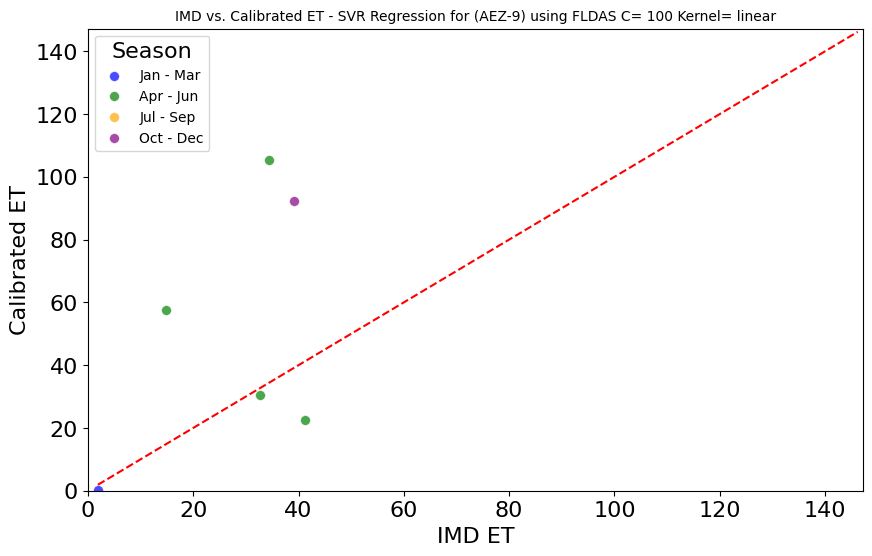

In [ ]:
all_SVM_results = []
all_SVM_pred = []

locations = ['Dantiwada (AEZ-2)' , 'Jodhpur (AEZ-2)', 'Durgapura (AEZ-4)', 'Jhansi (AEZ-4)', 'New Delhi (AEZ-4)', 'Rajkot (AEZ-4)', 'Anand (AEZ-5)', 'Bikramganj (AEZ-9)', 'Varanasi (AEZ-9)', 'Bhopal (AEZ-10)', 'Raipur (AEZ-11)', 'Lucknow (AEZ-13)']
# aezs = ['AEZ-2', 'AEZ-4', 'AEZ-5', 'AEZ-9', 'AEZ-10', 'AEZ-11', 'AEZ-13']
for location_id in locations:
  print(location_id)

  # Read excel sheet and only the columns that we want
  df = pd.read_excel(file_path, sheet_name=location_id, usecols=columns_to_read)

  # Dharmisha's logic for removing unneeded rows
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)

  # Following is code for removing outliers
  # ================= OUTLIER REMOVAL STARTS ================
  line_mean = df['Downscaled ET'].mean(skipna=True)
  line_std = df['Downscaled ET'].std(skipna=True)
  point_mean = df['IMD ET'].mean(skipna=True)
  point_std = df['IMD ET'].std(skipna=True)

  # Create a mask for outliers
  outlier_mask = (np.abs(df['IMD ET']) > point_mean + 2*point_std) | (np.abs(df['IMD ET']) < point_mean - 2*point_std)

  df.loc[outlier_mask, ['IMD ET']] = 0
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)
  # ================= OUTLIER REMOVAL ENDS ================

  # Only FLDAS
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation']
  # FLDAS + MET
  X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']


  # FLDAS + MET
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

  y_column = 'IMD ET'
  date_column = 'Date'

  X = df[X_columns].values
  y = df[y_column].values
  dates = df[date_column].values
  svr_kernels = ['linear', 'poly', 'rbf']  # List of kernels to evaluate
  svr_Cs = [0.1, 1, 10, 100]  # List of C values to evaluate
  # Evaluate models and collect results for the current location
  svm_results, svr_best_y_pred, svr_best_y_test, svr_best_dates, svr_best_c, svr_best_k, svr_best_r2, svr_best_rmse, svr_best_nrmse, svr_best_mae, svr_best_mse, svr_best_mape, svr_best_explained_variance, svr_best_pearson = evaluate_models(location_id, X, y, dates, svr_kernels, svr_Cs)
  all_SVM_results.append(svm_results)

  all_SVM_pred.extend([(location_id, svr_best_c, svr_best_k, date, test, pred, svr_best_r2, svr_best_rmse, svr_best_nrmse, svr_best_mae, svr_best_mse, svr_best_mape, svr_best_explained_variance, svr_best_pearson) for test, pred, date in zip(svr_best_y_test, svr_best_y_pred, svr_best_dates)])

  graphing(svr_best_y_test, svr_best_y_pred, dates, location_id, X_columns, locationimages)

# # Concatenate results for all locations
all_SVM_results = pd.concat(all_SVM_results)
# all_lasso_results = pd.concat(all_lasso_results)

all_SVM_pred_df = pd.DataFrame(all_SVM_pred, columns=['location', 'C', 'Kernel', 'dates', 'y_test', 'y_pred', 'r2','rmse', 'nrmse', 'mae', 'mse', 'mape', 'explained_variance','pearson'])
all_SVM_pred_df.to_csv('SVR_y_pred_best_models_fldas.csv', index=False)

# # Save the results to CSV
all_SVM_results.to_csv('all_SVM_results.csv', index=False)

## K Fold Cross Validation - For each AEZ

In [ ]:
all_SVM_results = []
all_SVM_pred = []

# locations = ['Dantiwada (AEZ-2)' , 'Jodhpur (AEZ-2)', 'Durgapura (AEZ-4)', 'Jhansi (AEZ-4)', 'New Delhi (AEZ-4)', 'Rajkot (AEZ-4)', 'Anand (AEZ-5)', 'Bikramganj (AEZ-9)', 'Varanasi (AEZ-9)', 'Bhopal (AEZ-10)', 'Raipur (AEZ-11)', 'Lucknow (AEZ-13)']
aezs = ['AEZ-2', 'AEZ-4', 'AEZ-5', 'AEZ-9', 'AEZ-10', 'AEZ-11', 'AEZ-13']
locations=aezs
for location_id in locations:
  print(location_id)

  # Read excel sheet and only the columns that we want
  df = pd.read_excel(file_path, sheet_name=location_id, usecols=columns_to_read)

  # Dharmisha's logic for removing unneeded rows
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)

  # Following is code for removing outliers
  # ================= OUTLIER REMOVAL STARTS ================
  line_mean = df['Downscaled ET'].mean(skipna=True)
  line_std = df['Downscaled ET'].std(skipna=True)
  point_mean = df['IMD ET'].mean(skipna=True)
  point_std = df['IMD ET'].std(skipna=True)

  # Create a mask for outliers
  outlier_mask = (np.abs(df['IMD ET']) > point_mean + 2*point_std) | (np.abs(df['IMD ET']) < point_mean - 2*point_std)

  df.loc[outlier_mask, ['IMD ET']] = 0
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)
  # ================= OUTLIER REMOVAL ENDS ================

  # Only FLDAS
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation']
  # FLDAS + MET
  X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']


  # FLDAS + MET
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

  y_column = 'IMD ET'
  date_column = 'Date'

  X = df[X_columns].values
  y = df[y_column].values
  dates = df[date_column].values
  svr_kernels = ['linear', 'poly', 'rbf']  # List of kernels to evaluate
  svr_Cs = [0.1, 1, 10, 100]  # List of C values to evaluate
  # Evaluate models and collect results for the current location
  svm_results, svr_best_y_pred, svr_best_y_test, svr_best_dates, svr_best_c, svr_best_k, svr_best_r2, svr_best_rmse, svr_best_nrmse, svr_best_mae, svr_best_mse, svr_best_mape, svr_best_explained_variance, svr_best_pearson = evaluate_models(location_id, X, y, dates, svr_kernels, svr_Cs)
  all_SVM_results.append(svm_results)

  all_SVM_pred.extend([(location_id, svr_best_c, svr_best_k, date, test, pred, svr_best_r2, svr_best_rmse, svr_best_nrmse, svr_best_mae, svr_best_mse, svr_best_mape, svr_best_explained_variance, svr_best_pearson) for test, pred, date in zip(svr_best_y_test, svr_best_y_pred, svr_best_dates)])

  graphing(svr_best_y_test, svr_best_y_pred, dates, location_id, X_columns, aezimages)

# # Concatenate results for all locations
all_SVM_results = pd.concat(all_SVM_results)
# all_lasso_results = pd.concat(all_lasso_results)

all_SVM_pred_df = pd.DataFrame(all_SVM_pred, columns=['location', 'C', 'Kernel', 'dates', 'y_test', 'y_pred', 'r2','rmse', 'nrmse', 'mae', 'mse', 'mape', 'explained_variance','pearson'])
all_SVM_pred_df.to_csv('SVR_y_pred_best_models_fldas.csv', index=False)

# # Save the results to CSV
all_SVM_results.to_csv('all_SVM_results.csv', index=False)

# Calibration using Random Forest Regression

## Random Forest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from scipy.stats import pearsonr
import statsmodels.api as sm
import math
columns_to_read = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation', 'MSAVI', 'NDMI', 'NDVI', 'SAVI', 'NDBI', 'NDIIB7', 'ALBEDO', 'LST']
columns_to_replace = ['Date', 'Downscaled ET', 'IMD ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'MSAVI', 'NDMI', 'NDVI', 'SAVI', 'NDBI', 'NDIIB7', 'ALBEDO', 'LST']

file_path = '/content/ET_Version_2.xlsx'  # Replace with your actual file path

# Function to evaluate models and calculate metrics for a single location
def evaluate_models(location_id, X, y, dates, rf_estimators, rf_max_depths):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    def evaluate_model(model, param_name, param_values, secondary_param_name, secondary_param_values):
        results = []
        for value1 in param_values:
            for value2 in secondary_param_values:
                fold_results = {
                    'location': location_id,
                    param_name: value1,
                    secondary_param_name: value2,
                    'std_err': [],
                    'rmse': [],
                    'nrmse': [],
                    'mae': [],
                    'mse': [],
                    'mape': [],
                    'explained_variance': [],
                    'r2': [],
                    'pearson': [],
                    'y_pred': [],
                    'y_test': [],
                    'date_test': [],
                }

                model.set_params(**{param_name: value1, secondary_param_name: value2})

                for train_index, test_index in kf.split(X):
                    X_train, X_test = X[train_index], X[test_index]
                    y_train, y_test = y[train_index], y[test_index]

                    dates_train = dates[train_index]
                    dates_test = list(dates[test_index])

                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)

                    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                    nrmse = rmse / (y_test.max() - y_test.min())
                    mae = mean_absolute_error(y_test, y_pred)
                    mse = mean_squared_error(y_test, y_pred)
                    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
                    explained_variance = explained_variance_score(y_test, y_pred)

                    corr_matrix = np.corrcoef(y_test, y_pred)
                    corr = corr_matrix[0, 1]
                    r2 = corr ** 2

                    pearson_corr, _ = pearsonr(y_test, y_pred)

                    # Using statsmodels for obtaining p-values and standard errors
                    X_train_sm = sm.add_constant(X_train)  # Adding intercept term
                    model_sm = sm.OLS(y_train, X_train_sm)
                    results_sm = model_sm.fit()
                    p_values = results_sm.pvalues[1:]  # Exclude intercept p-value
                    std_err = results_sm.bse[1:]  # Standard errors excluding intercept

                    fold_results['std_err'].append(std_err)
                    fold_results['rmse'].append(rmse)
                    fold_results['nrmse'].append(nrmse)
                    fold_results['mae'].append(mae)
                    fold_results['mse'].append(mse)
                    fold_results['mape'].append(mape)
                    fold_results['explained_variance'].append(explained_variance)
                    fold_results['r2'].append(r2)
                    fold_results['pearson'].append(pearson_corr)
                    fold_results['y_pred'].extend(y_pred)
                    fold_results['y_test'].extend(y_test)
                    fold_results['date_test'].extend(dates_test)

                results.append(fold_results)
        return results

    # Evaluate Random Forest with different hyperparameters
    rf_results = []
    rf_model = RandomForestRegressor(random_state=42)
    rf_results.extend(evaluate_model(rf_model, 'n_estimators', rf_estimators, 'max_depth', rf_max_depths))

    # Calculate average metrics across folds and identify best model
    def calculate_average_metrics(results):
        avg_results = {
            'location': [],
            'n_estimators': [],
            'max_depth': [],
            'avg_rmse': [],
            'avg_nrmse': [],
            'avg_mae': [],
            'avg_mse': [],
            'avg_mape': [],
            'avg_explained_variance': [],
            'avg_r2': [],
            'avg_pearson': [],
            'avg_std_err': [],
        }

        best_rmse = None
        best_pearson = float('-inf')
        best_n = float('inf') # n_estimators
        best_d = float('inf') # depth
        best_y_pred = None
        best_y_test = None
        # best_param = None
        best_dates = None
        best_nrmse = None
        best_mae = None
        best_mse = None
        best_mape = None
        best_explained_variance = None
        best_r2 = None

        for res in results:
            location = res['location']
            param1 = res['n_estimators']
            param2 = res['max_depth']
            avg_rmse = np.mean(res['rmse'])
            avg_nrmse = np.mean(res['nrmse'])
            avg_mae = np.mean(res['mae'])
            avg_mse = np.mean(res['mse'])
            avg_mape = np.mean(res['mape'])
            avg_explained_variance = np.mean(res['explained_variance'])
            avg_r2 = np.mean(res['r2'])
            avg_pearson = np.mean(res['pearson'])
            avg_std_err = np.mean(res['std_err'], axis=0)  # Average standard errors across folds

            avg_results['location'].append(location)
            avg_results['n_estimators'].append(param1)
            avg_results['max_depth'].append(param2)
            avg_results['avg_rmse'].append(avg_rmse)
            avg_results['avg_nrmse'].append(avg_nrmse)
            avg_results['avg_mae'].append(avg_mae)
            avg_results['avg_mse'].append(avg_mse)
            avg_results['avg_mape'].append(avg_mape)
            avg_results['avg_explained_variance'].append(avg_explained_variance)
            avg_results['avg_r2'].append(avg_r2)
            avg_results['avg_pearson'].append(avg_pearson)
            avg_results['avg_std_err'].append(avg_std_err)

            if (not(math.isnan(avg_r2)) and not(math.isnan(avg_pearson))):
              if best_pearson < avg_pearson:
                      best_pearson = avg_pearson
                      best_y_pred = res['y_pred']
                      best_y_test = res['y_test']
                      best_dates = res['date_test']
                      # best_param = f"n_estimators= {param1} max_depth= {param2}"
                      best_n = param1
                      best_d = param2
                      best_r2 = avg_r2
                      best_rmse = avg_rmse
                      best_nrmse = avg_nrmse
                      best_mae = avg_mae
                      best_mse = avg_mse
                      best_mape = avg_mape
                      best_explained_variance = avg_explained_variance


        return pd.DataFrame(avg_results), best_y_pred, best_y_test, best_dates, best_n, best_d, best_r2, best_rmse, best_nrmse, best_mae, best_mse, best_mape, best_explained_variance, best_pearson

    rf_avg_metrics, rf_best_y_pred, rf_best_y_test, rf_best_dates, rf_best_n, rf_best_d, rf_best_r2, rf_best_rmse, rf_best_nrmse, rf_best_mae, rf_best_mse, rf_best_mape, rf_best_explained_variance, rf_best_pearson  = calculate_average_metrics(rf_results)

    return rf_avg_metrics, rf_best_y_pred, rf_best_y_test, rf_best_dates, rf_best_n, rf_best_d, rf_best_r2, rf_best_rmse, rf_best_nrmse, rf_best_mae, rf_best_mse, rf_best_mape, rf_best_explained_variance, rf_best_pearson


Dantiwada (AEZ-2)


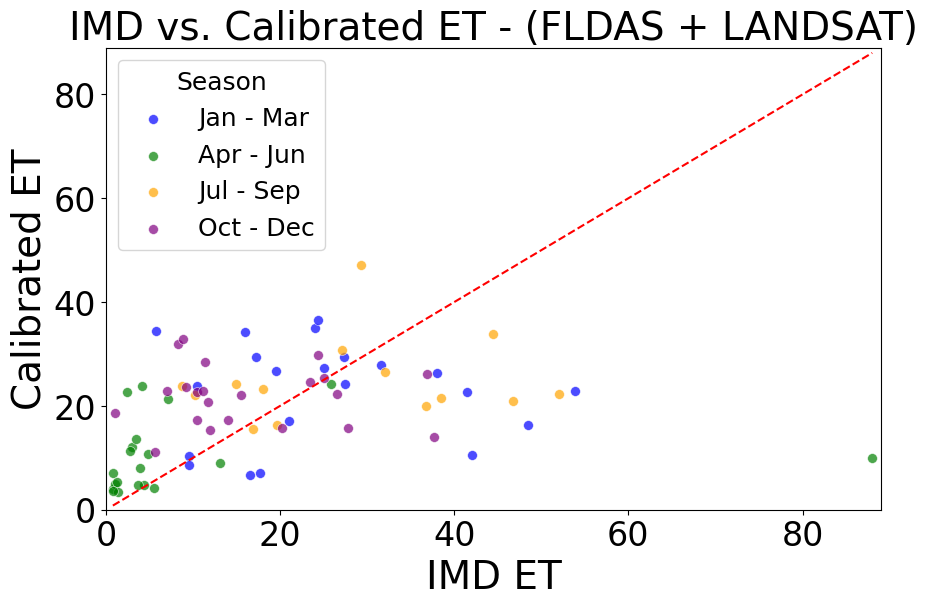

Jodhpur (AEZ-2)


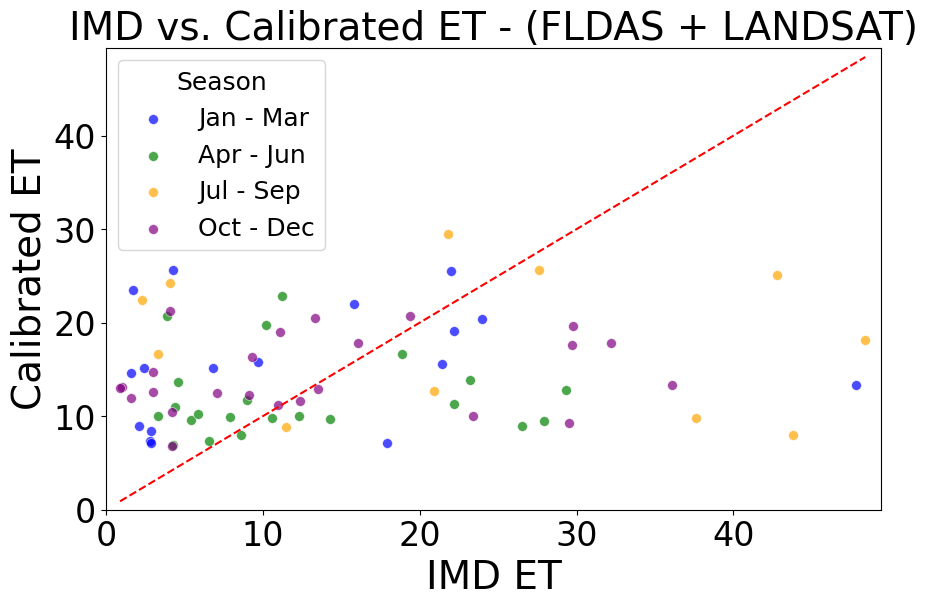

Durgapura (AEZ-4)


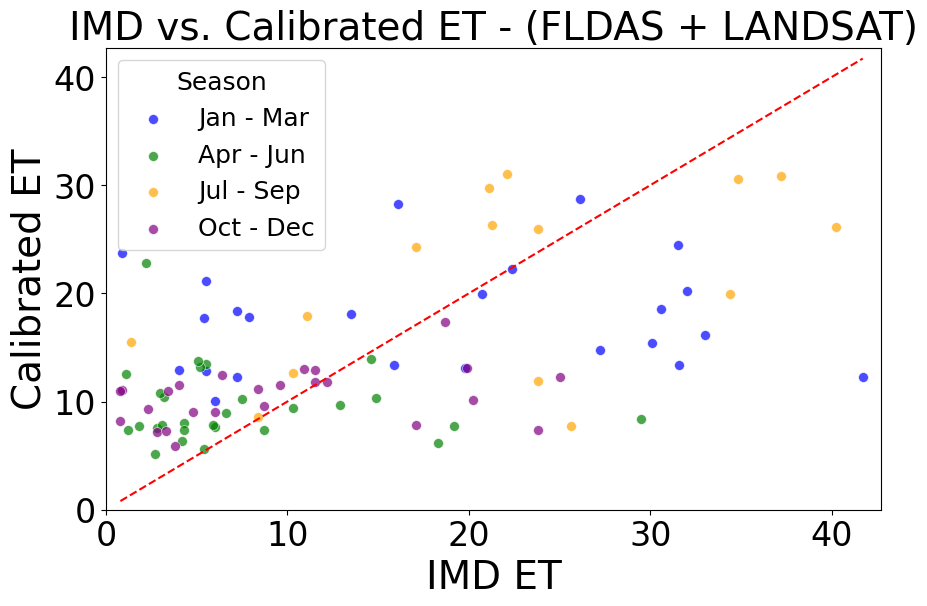

New Delhi (AEZ-4)


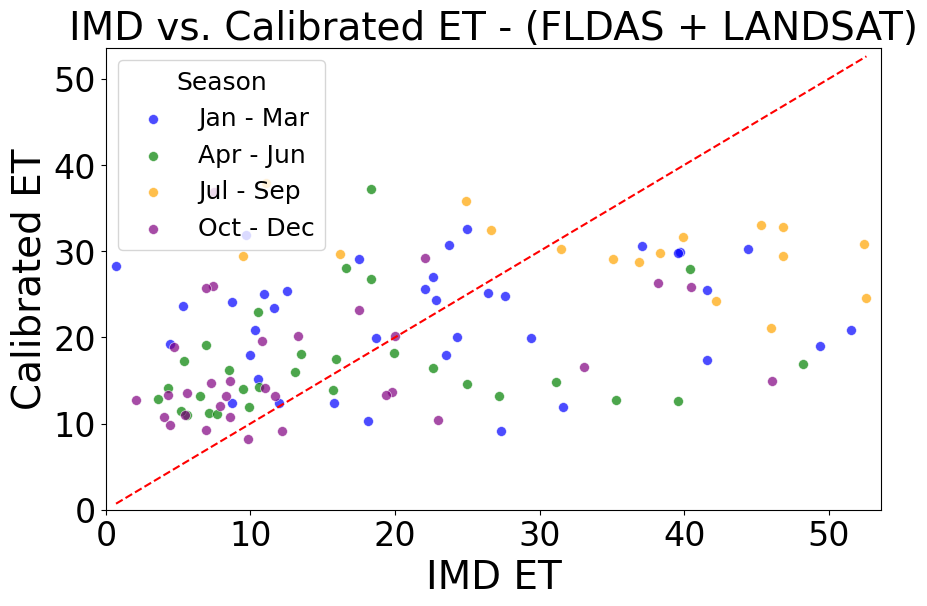

Rajkot (AEZ-4)


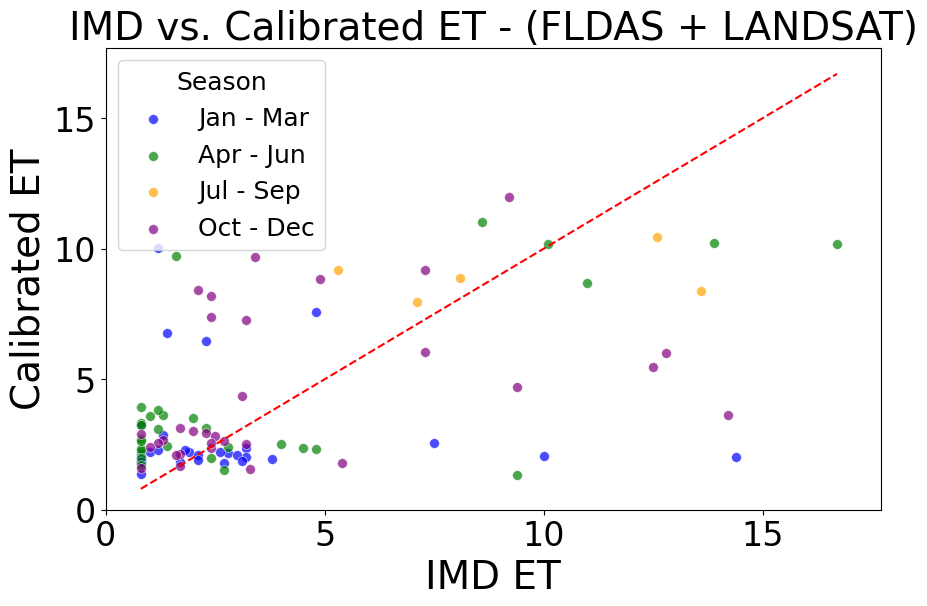

Anand (AEZ-5)


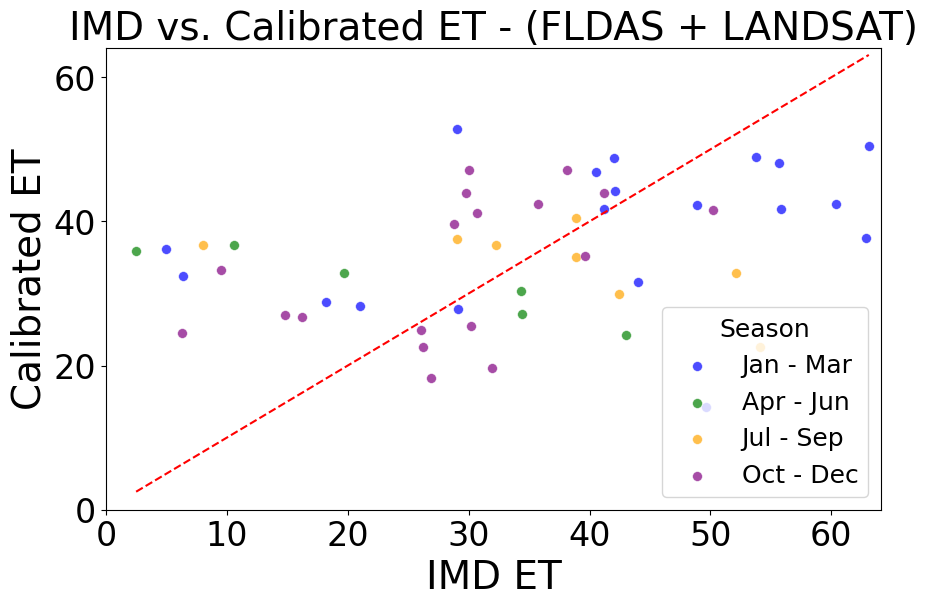

Bhopal (AEZ-10)


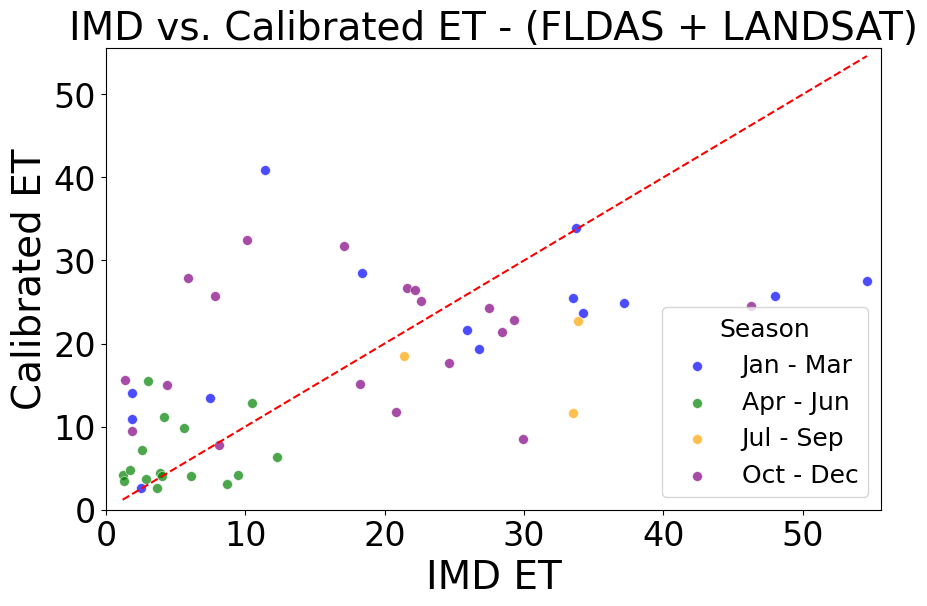

Raipur (AEZ-11)


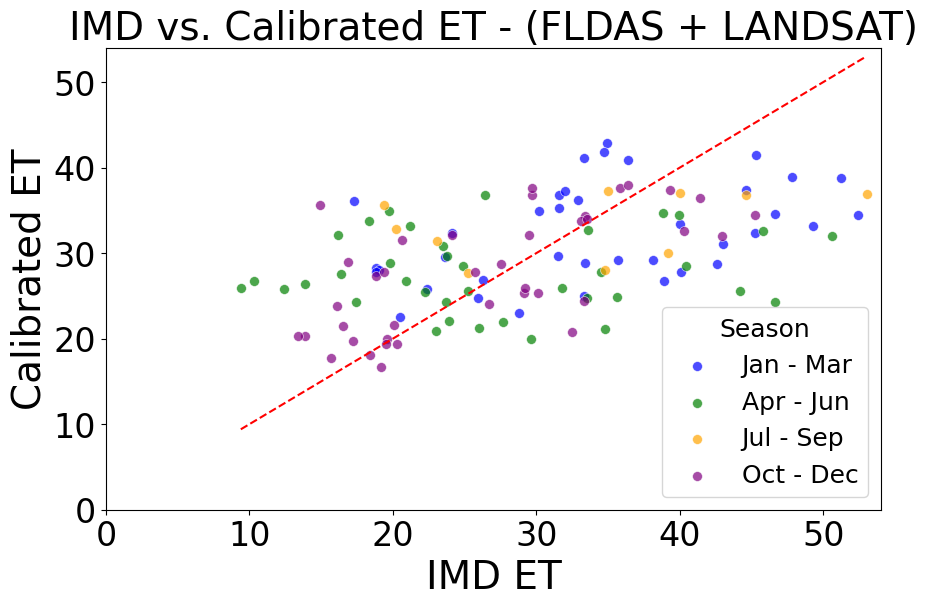

Lucknow (AEZ-13)


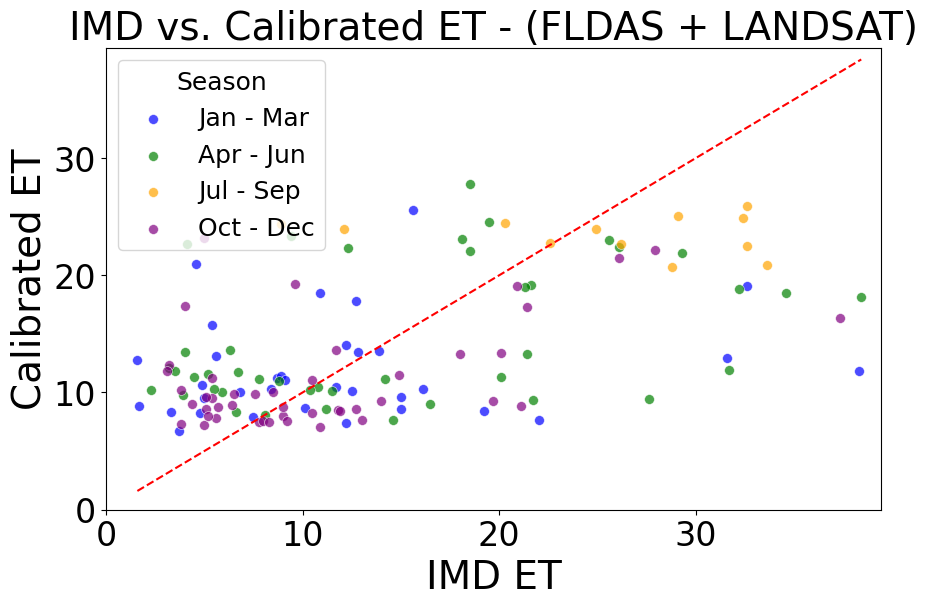

In [ ]:
all_rf_results = []
all_rf_y_pred = []

locations = ['Dantiwada (AEZ-2)' , 'Jodhpur (AEZ-2)', 'Durgapura (AEZ-4)', 'New Delhi (AEZ-4)', 'Rajkot (AEZ-4)', 'Anand (AEZ-5)', 'Bhopal (AEZ-10)', 'Raipur (AEZ-11)', 'Lucknow (AEZ-13)']
aezs = ['AEZ-2', 'AEZ-4', 'AEZ-5', 'AEZ-9', 'AEZ-10', 'AEZ-11', 'AEZ-13']
# locations = aezs
for location_id in locations:
  print(location_id)

  # Read excel sheet and only the columns that we want
  df = pd.read_excel(file_path, sheet_name=location_id, usecols=columns_to_read)

  # Dharmisha's logic for removing unneeded rows
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)

  # Following is code for removing outliers
  # ================= OUTLIER REMOVAL STARTS ================
  line_mean = df['Downscaled ET'].mean(skipna=True)
  line_std = df['Downscaled ET'].std(skipna=True)
  point_mean = df['IMD ET'].mean(skipna=True)
  point_std = df['IMD ET'].std(skipna=True)

  # Create a mask for outliers
  outlier_mask = (np.abs(df['IMD ET']) > point_mean + 2*point_std) | (np.abs(df['IMD ET']) < point_mean - 2*point_std)

  df.loc[outlier_mask, ['IMD ET']] = 0
  df[columns_to_replace] = df[columns_to_replace].replace([-1, 0], np.nan)
  df.dropna(subset=columns_to_replace, inplace=True)
  # ================= OUTLIER REMOVAL ENDS ================

  # Only FLDAS
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation']
  # FLDAS + MET
  X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']


  # FLDAS + MET
  # X_columns = ['Downscaled ET', 'Temp(C)', 'Humidity', 'Soil Moisture', 'Precipitation','MSAVI', 'NDMI',	'NDVI',	'SAVI',	'NDBI',	'NDIIB7',	'ALBEDO',	'LST']

  y_column = 'IMD ET'
  date_column = 'Date'

  X = df[X_columns].values
  y = df[y_column].values
  dates = df[date_column].values

  rf_estimators = [50, 100, 200]  # Example range of n_estimators
  rf_max_depths = [5, 10, 20]  # Example range of max_depth

  rf_results, rf_best_y_pred, rf_best_y_test, rf_best_dates, rf_best_n, rf_best_d, rf_best_r2, rf_best_rmse, rf_best_nrmse, rf_best_mae, rf_best_mse, rf_best_mape, rf_best_explained_variance, rf_best_pearson = evaluate_models(location_id, X, y, dates, rf_estimators, rf_max_depths)

  all_rf_results.append(rf_results)

  all_rf_y_pred.extend([(location_id, rf_best_n, rf_best_d, date, test, pred, rf_best_r2, rf_best_rmse, rf_best_nrmse, rf_best_mae, rf_best_mse, rf_best_mape, rf_best_explained_variance, rf_best_pearson) for test, pred, date in zip(rf_best_y_test, rf_best_y_pred, rf_best_dates)])


  if(len(locations)>7):
    graphing(rf_best_y_test, rf_best_y_pred, rf_best_dates, location_id, X_columns, locationimages)
  else:
    graphing(rf_best_y_test, rf_best_y_pred, rf_best_dates, location_id, X_columns, aezimages)

# # Concatenate results for all locations
# all_rf_results = pd.concat(all_rf_results)
# # all_lasso_results = pd.concat(all_lasso_results)

# # # Save the results to CSV
# all_rf_results.to_csv('all_RF_results.csv', index=False)


# all_RF_pred_df = pd.DataFrame(all_rf_y_pred, columns=['location', 'n_estimators', 'depth', 'dates', 'y_test', 'y_pred', 'r2','rmse', 'nrmse', 'mae', 'mse', 'mape', 'explained_variance','pearson'])
# all_RF_pred_df.to_csv('RF_y_pred_best_models_fldas.csv', index=False)

